In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ukb_gwas import *
from scipy import stats

slope:  3.84848484848485
intercept:  9.606060606060609


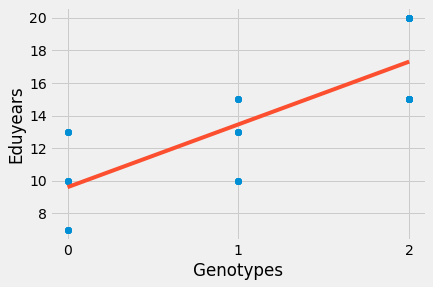

r-sq 0.6333791478499902
slope: [3.84848485]
intercept: 9.606060606060606


In [2]:
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
zeros = [0] * 12
ones =  [1] * 12
twos =  [2] * 24
genos = np.array(zeros + ones + twos)
lowphenos = [7,10,13] * 4
midphenos = [10,13,15] * 4
hiphenos = [15,20] * 12
phenos = np.array(lowphenos + midphenos + hiphenos)

x = genos
y = phenos

# Fit with polyfit
b, m = polyfit(x, y, 1)
print('slope: ',m)
print('intercept: ',b)
plt.style.use('fivethirtyeight')
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-')
plt.xticks([0,1,2],['0','1','2'])
plt.xlabel('Genotypes')
plt.ylabel('Eduyears')
plt.show()

model = LinearRegression()
genos_l = np.array(genos).reshape((-1, 1))
model.fit(genos_l, phenos)
print('r-sq', model.score(genos_l, phenos))
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope:  3.7499999999999996
intercept:  9.638888888888893


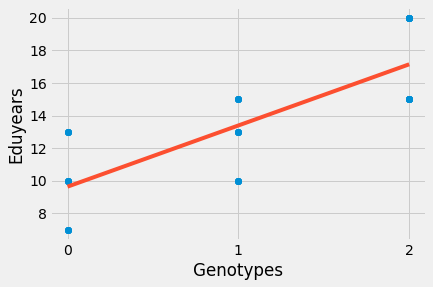

r-sq 0.619771475209141
slope: [3.75]
intercept: 9.638888888888888


In [3]:
# what if we reduced the highest category by half as many samples
# but left others the same?
zeros = [0] * 12
ones =  [1] * 12
twos =  [2] * 12 # used to be 24
genos = np.array(zeros + ones + twos)
lowphenos = [7,10,13] * 4
midphenos = [10,13,15] * 4
hiphenos = [15,20] * 6 # used to be 12
phenos = np.array(lowphenos + midphenos + hiphenos)
x = genos
y = phenos
# Fit with polyfit
b, m = polyfit(x, y, 1)
print('slope: ',m)
print('intercept: ',b)
plt.style.use('fivethirtyeight')
plt.plot(x, y, 'o')
plt.plot(x, b + m * x, '-')
plt.xticks([0,1,2],['0','1','2'])
plt.xlabel('Genotypes')
plt.ylabel('Eduyears')
plt.show()

model = LinearRegression()
genos_l = np.array(genos).reshape((-1, 1))
model.fit(genos_l, phenos)
print('r-sq', model.score(genos_l, phenos))
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope:  3.7499999999999996
intercept:  9.638888888888893


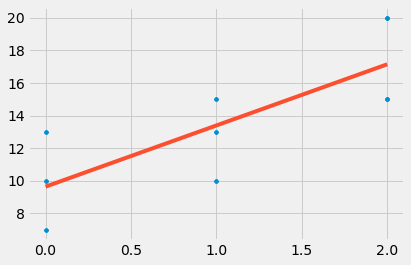

In [4]:
from numpy.polynomial.polynomial import polyfit
x = genos
y = phenos
# Fit with polyfit
b, m = polyfit(x, y, 1)
print('slope: ',m)
print('intercept: ',b)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [5]:
mus_wba_eids = [int(x.split()[0]) for x in open('../00_csv_files/mus_wba_eids.csv','r').readlines()]
print(mus_wba_eids[0])

4194304


In [6]:
pob_por_migration = pd.read_csv('../00_csv_files/pob_por_migration.csv')
pob_por_migration.head(2)

,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042


In [7]:
all_movers = pob_por_migration[pob_por_migration.distances > 20000].eid.tolist()
all_stayers = pob_por_migration[pob_por_migration.distances <= 20000].eid.tolist()
wba_movers = list(set(all_movers)&set(mus_wba_eids))
wba_stayers = list(set(all_stayers)&set(mus_wba_eids))
print(len(wba_movers),len(wba_stayers))

152227 177519


# gwas of mover status (all WBA, see born-close below)

In [5]:
# make mover status phenotype file
with open('../pheno/pheno_mover_status.csv','w') as o:
    for eid in wba_stayers:
        o.write(str(eid) + ' ' + str(eid) + ' ' + str(1) + '\n')
    for eid in wba_movers:
        o.write(str(eid) + ' ' + str(eid) + ' ' + str(2) + '\n')

In [5]:
fstem = 'chr'
fdir = 'mover_status/'
onePositions, oneVariants, onePvals, oneBetas, oneErrors = load_chromosomes(fstem,fdir) 

mover_status/chr1.all.glm.logistic
done loading chromosomes


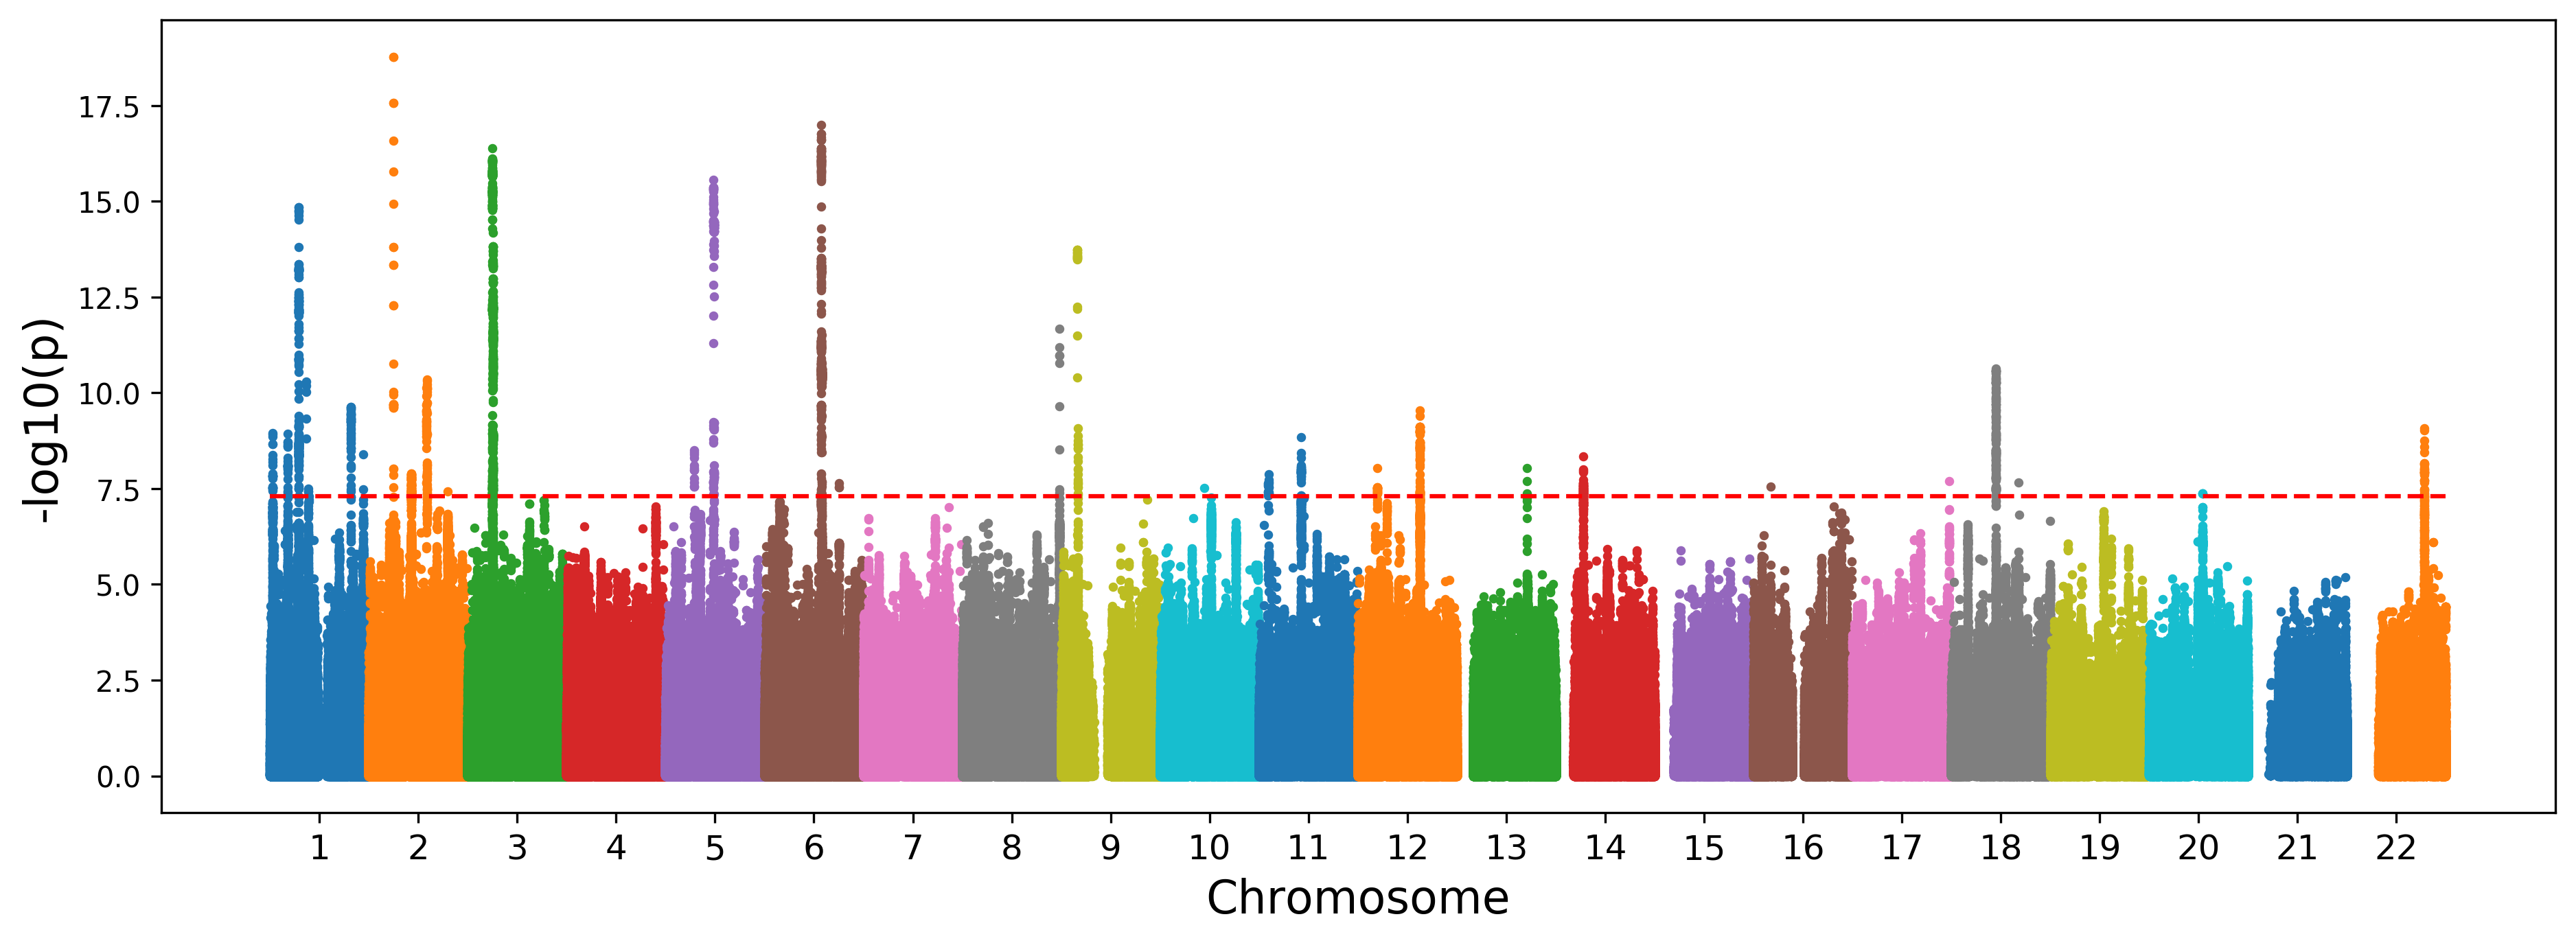

In [5]:
plt.style.use('default')
manhattanPlotGenome(onePositions,onePvals)

In [6]:
mover_status_b, mover_status_e = get_betas_and_errors(fdir,'logistic')

In [11]:
# getting standard snp set for EDUYEARS
eduyears_lead_snps = pd.read_excel('41588_2018_147_MOESM3_ESM.xlsx', 
                                  sheet_name = '2. EduYears Lead SNPs',
                                  skipfooter = 2, header = 1, index_col = None )
ea_snplist = eduyears_lead_snps.SNP.tolist()
print(len(ea_snplist))
print(ea_snplist[:5])

1271
['rs9859556', 'rs7029718', 'rs1334297', 'rs9375188', 'rs2526398']


In [12]:
# getting standard snp set for HEIGHT
height_giant = pd.read_csv('giant_locke_2018_height_snps.txt',delimiter = '\t')
height_snplist = height_giant.SNP.tolist()
print(len(height_snplist))
print(height_snplist[:5])
sizedMatched_height_snplist = np.random.choice(height_snplist,len(ea_snplist),replace=False)
print(len(sizedMatched_height_snplist))

3290
['rs10003497', 'rs1000410', 'rs10008015', 'rs10010325', 'rs10016290']
1271


In [13]:
# getting standard snp set for BMI
bmi_giant = pd.read_csv('Locke_GIANT_bmi_snps.txt',delimiter = '\t')
bmi_snplist = bmi_giant.SNP.tolist()
print(len(bmi_snplist))
print(bmi_snplist[:5])
bmi_giant.head(3)

941
['rs1000096', 'rs1000940', 'rs1003081', 'rs10035289', 'rs10037047']


,SNP,CHR,POS,Tested_Allele,Other_Allele,Freq_Tested_Allele_in_HRS,BETA,SE,P,N,BETA_COJO,SE_COJO,P_COJO
0,rs1000096,4,38692835,T,C,0.3801,-0.0144,0.0018,1.800000e-15,656860,-0.013388,0.001814,1.573490e-13
1,rs1000940,17,5283252,A,G,0.7013,-0.0154,0.0018,1.100000e-17,794558,-0.011496,0.001868,7.622490e-10
2,rs1003081,11,118913993,T,C,0.4497,0.0121,0.0016,1.300000e-13,788712,0.010456,0.001664,3.316880e-10


In [25]:
ea_snplist_betas =  np.array([mover_status_b[x] for x in ea_snplist if x in mover_status_b.keys()])
ea_snplist_errors = np.array([mover_status_e[x] for x in ea_snplist if x in mover_status_e.keys()])
height_snplist_betas =  np.array([mover_status_b[x] for x in sizedMatched_height_snplist if x in mover_status_b.keys()])
height_snplist_errors = np.array([mover_status_e[x] for x in sizedMatched_height_snplist if x in mover_status_e.keys()])

In [26]:
# # for logistic, take log
ea_snplist_betas     = np.log10(ea_snplist_betas)
height_snplist_betas = np.log10(height_snplist_betas)

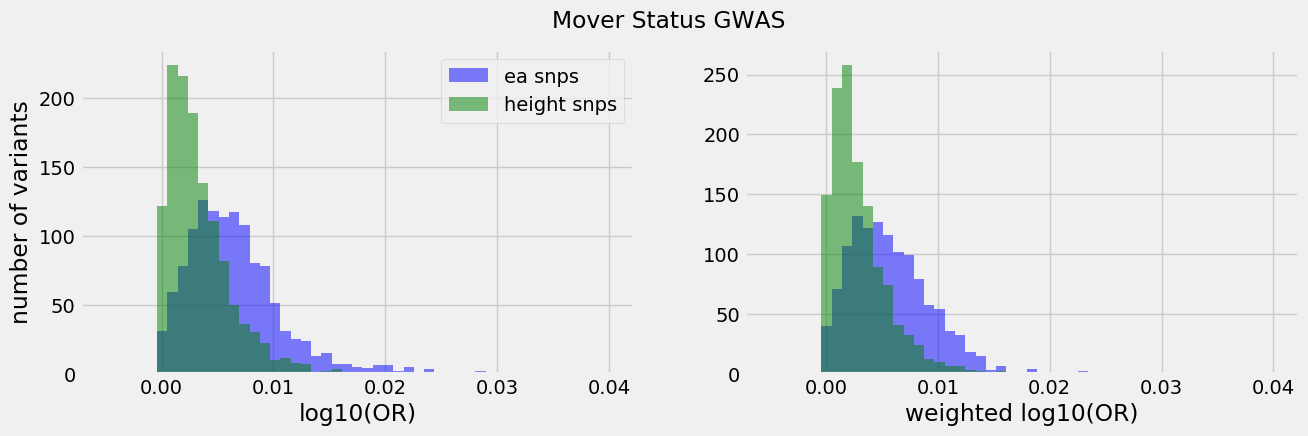

In [27]:
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = ea_snplist_betas
b2 = height_snplist_betas
bins = np.linspace(-0.005, 0.04, numBins)

f,(a1,a2) = plt.subplots(1,2,figsize = (14,4))
a1.hist(abs(b1),bins,alpha = 0.5, label='ea snps', color = 'blue')
a1.hist(abs(b2),bins,alpha = 0.5, label='height snps', color = 'green')

a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('log10(OR)')

j1,j2,wb1 = get_weighted_avg_beta(ea_snplist_betas,ea_snplist_errors)
j1,j2,wb2 = get_weighted_avg_beta(height_snplist_betas,height_snplist_errors)
a2.hist(abs(wb1),bins,alpha = 0.5, label='ea snps\nweighted log10(OR)', color = 'blue')
a2.hist(abs(wb2),bins,alpha = 0.5, label='height snps\nweighted log10(OR)', color = 'green')
a2.set_xlabel('weighted log10(OR)')
plt.suptitle('Mover Status GWAS')
plt.show()

# mover status born_close

In [5]:
fstem = 'chr'
fdir = 'moverstatus_wbabornclose_propcs40'
onePositions, oneVariants, onePvals, oneBetas, oneErrors = load_chromosomes(fstem,fdir) 

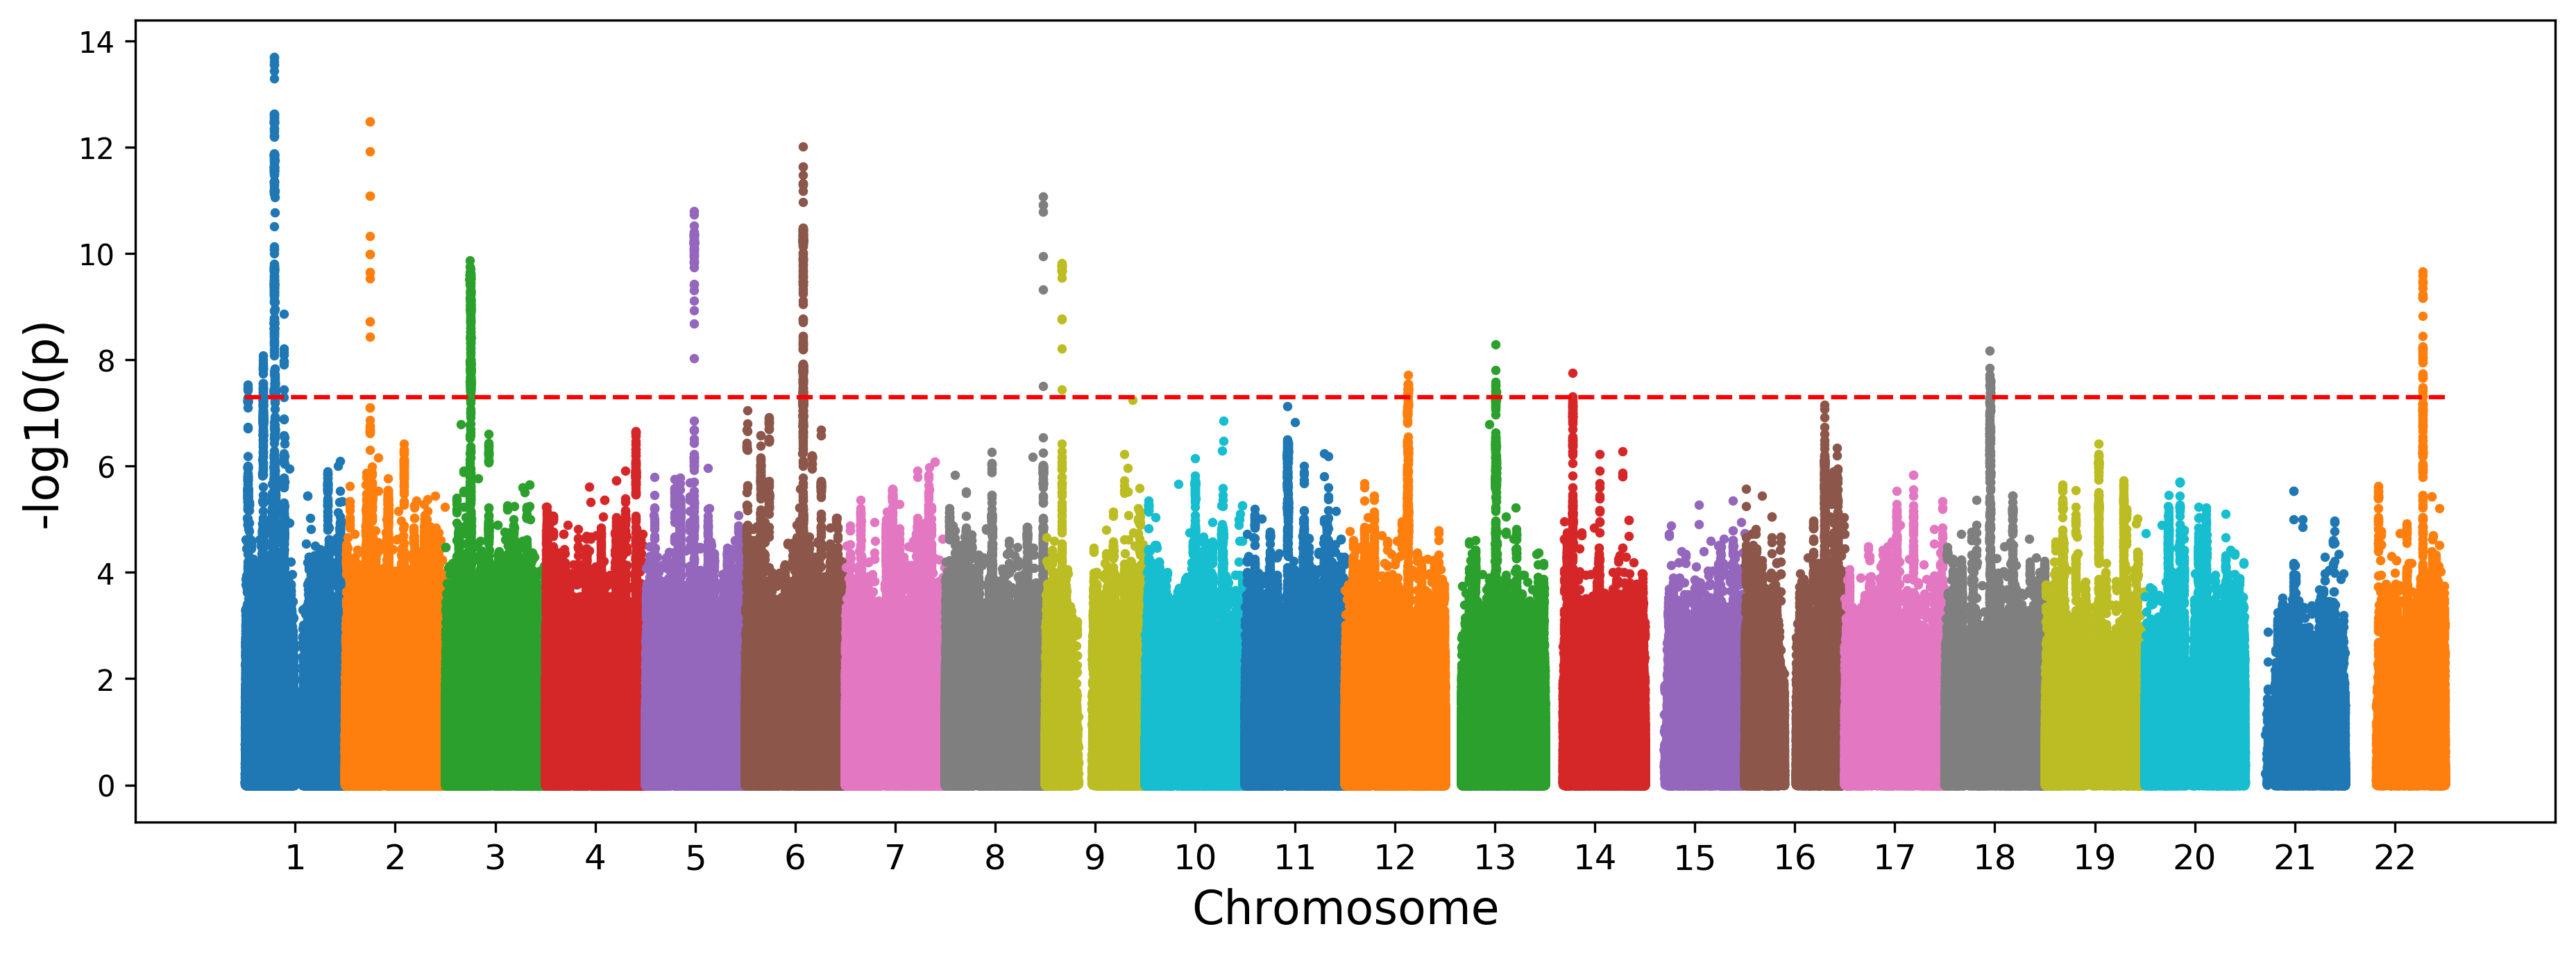

In [3]:
# plt.style.use('default')
# manhattanPlotGenome(onePositions,onePvals)

In [7]:
mover_status_b, mover_status_e = get_betas_and_errors(fdir,'logistic')

In [8]:
# getting standard snp set for EDUYEARS
eduyears_lead_snps = pd.read_excel('41588_2018_147_MOESM3_ESM.xlsx', 
                                  sheet_name = '2. EduYears Lead SNPs',
                                  skipfooter = 2, header = 1, index_col = None )
ea_snplist = eduyears_lead_snps.SNP.tolist()
print(len(ea_snplist))
print(ea_snplist[:5])

1271
['rs9859556', 'rs7029718', 'rs1334297', 'rs9375188', 'rs2526398']


In [9]:
# getting standard snp set for HEIGHT
height_giant = pd.read_csv('giant_locke_2018_height_snps.txt',delimiter = '\t')
height_snplist = height_giant.SNP.tolist()
print(len(height_snplist))
print(height_snplist[:5])

3290
['rs10003497', 'rs1000410', 'rs10008015', 'rs10010325', 'rs10016290']


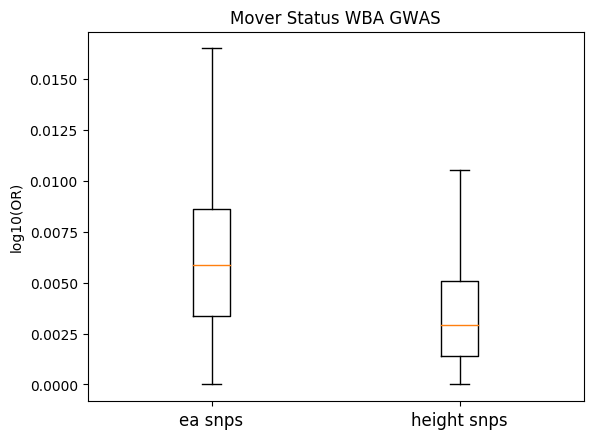

In [10]:
ea_snplist_betas =  np.log10(np.array([mover_status_b[x] for x in ea_snplist if x in mover_status_b.keys()]))
height_snplist_betas =  np.log10(np.array([mover_status_b[x] for x in height_snplist if x in mover_status_b.keys()]))
plt.boxplot([abs(ea_snplist_betas),abs(height_snplist_betas)],showfliers=False)
plt.xticks([1,2],['ea snps','height snps'],fontsize=12)
plt.ylabel('log10(OR)')
plt.title('Mover Status WBA GWAS')
plt.show()

In [11]:
# match sample size to number of EA snps (for histogram)
sizedMatched_height_snplist = np.random.choice(height_snplist,len(ea_snplist),replace=False)
print(len(sizedMatched_height_snplist))
height_snplist = sizedMatched_height_snplist

1271


In [12]:
ea_snplist_betas =  np.array([mover_status_b[x] for x in ea_snplist if x in mover_status_b.keys()])
ea_snplist_errors = np.array([mover_status_e[x] for x in ea_snplist if x in mover_status_e.keys()])
height_snplist_betas =  np.array([mover_status_b[x] for x in height_snplist if x in mover_status_b.keys()])
height_snplist_errors = np.array([mover_status_e[x] for x in height_snplist if x in mover_status_e.keys()])

In [13]:
# # for logistic, take log
ea_snplist_betas     = np.log10(ea_snplist_betas)
height_snplist_betas = np.log10(height_snplist_betas)

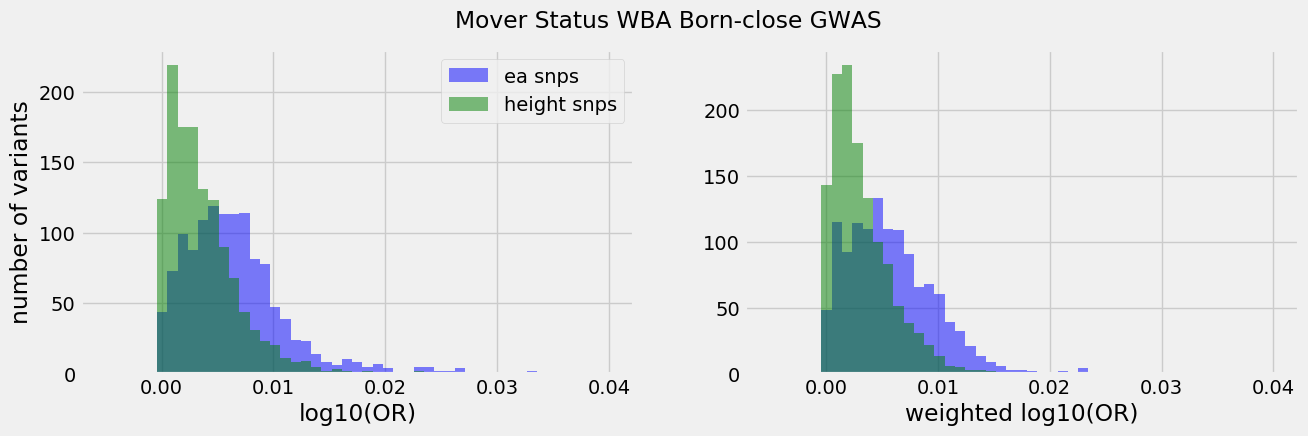

In [14]:
# let's look at those betas!
numBins = 50
plt.style.use('fivethirtyeight')
b1 = ea_snplist_betas
b2 = height_snplist_betas
bins = np.linspace(-0.005, 0.04, numBins)

f,(a1,a2) = plt.subplots(1,2,figsize = (14,4))
a1.hist(abs(b1),bins,alpha = 0.5, label='ea snps', color = 'blue')
a1.hist(abs(b2),bins,alpha = 0.5, label='height snps', color = 'green')

a1.legend(loc='upper right')
a1.set_ylabel('number of variants')
#plt.yscale('log')
a1.set_xlabel('log10(OR)')

j1,j2,wb1 = get_weighted_avg_beta(ea_snplist_betas,ea_snplist_errors)
j1,j2,wb2 = get_weighted_avg_beta(height_snplist_betas,height_snplist_errors)
a2.hist(abs(wb1),bins,alpha = 0.5, label='ea snps\nweighted log10(OR)', color = 'blue')
a2.hist(abs(wb2),bins,alpha = 0.5, label='height snps\nweighted log10(OR)', color = 'green')
a2.set_xlabel('weighted log10(OR)')
plt.suptitle('Mover Status WBA Born-close GWAS')
plt.show()

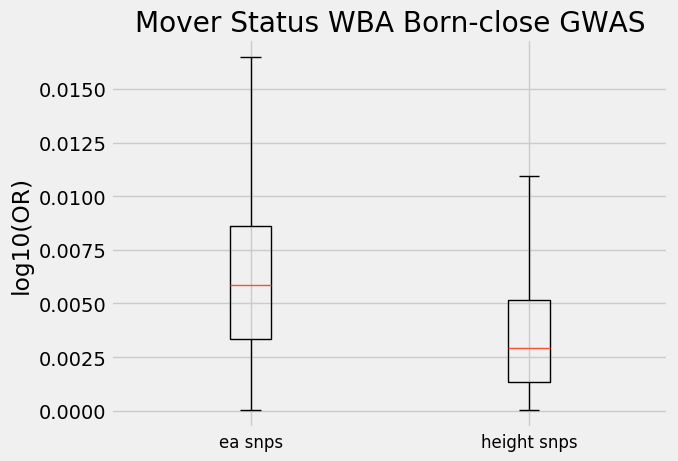

In [15]:
plt.boxplot([abs(b1),abs(b2)],showfliers=False)
plt.xticks([1,2],['ea snps','height snps'],fontsize=12)
plt.ylabel('log10(OR)')
plt.title('Mover Status WBA Born-close GWAS')
plt.show()

In [19]:
# getting standard snp set for sleep duration
sleepduration_lead_snps = pd.read_excel('gwas_catalog_sleepduration.xlsx', 
                                  sheet_name = 'Sheet1',
                                  header = 0, index_col = None )

sleepduration_snplist = sleepduration_lead_snps.snp.tolist()
print(len(sleepduration_snplist))
print(sleepduration_snplist[:5])
sleepduration_lead_snps.head(5)

317
['rs10138240', 'rs10823730', 'rs10987006', 'rs112477743', 'rs113851554']


,snp,allele,p,PvalAnnotation,RAF,OR,BETA,CI,Gene,Trait,Traits,Accession,Location
0,rs10138240,G,9 x 10-6,NaN,0.513767,-,0.020360729 SD units increase,[0.011-0.029],KCNH5,Sleep duration,sleep duration,GCST006914,14:62886761
1,rs10823730,T,6 x 10-9,NaN,0.595,-,0.027 SD units increase,[0.017-0.037],"SLC29A3, CDH23",Sleep duration,sleep duration,GCST006914,10:71387550
2,rs10987006,C,7 x 10-9,NaN,0.355,-,0.028 SD units increase,[0.018-0.038],PBX3,Sleep duration,sleep duration,GCST006914,9:125889260
3,rs112477743,G,1 x 10-8,NaN,0.718,-,0.029 SD units increase,[0.019-0.039],AL589740.1,Sleep duration,sleep duration,GCST006914,6:98202301
4,rs113851554,G,3 x 10-18,NaN,0.943,-,0.09 SD units increase,[0.07-0.11],MEIS1,Sleep duration,sleep duration,GCST006914,2:66523432


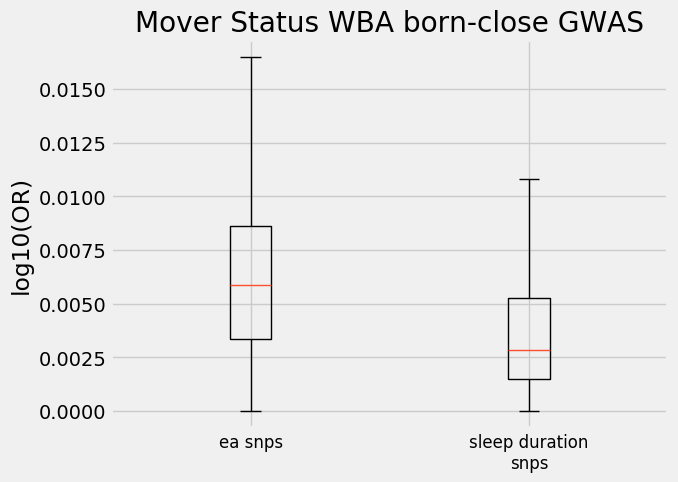

In [17]:
ea_snplist_betas =             np.log10(np.array([mover_status_b[x] for x in ea_snplist if x in mover_status_b.keys()]))
sleepduration_snplist_betas =  np.log10(np.array([mover_status_b[x] for x in sleepduration_snplist if x in mover_status_b.keys()]))
toPlot = [np.abs(ea_snplist_betas), np.abs(sleepduration_snplist_betas)]
plt.boxplot(toPlot,showfliers = False)
# plt.boxplot([np.abs(ea_snplist_betas),np.abs(sleepduration_snplist)],showfliers=False)
plt.xticks([1,2],['ea snps','sleep duration\nsnps'],fontsize=12)
plt.ylabel('log10(OR)')
plt.title('Mover Status WBA born-close GWAS')
plt.show()

### map of born_close

In [4]:
pob_por_ac = pd.read_csv('../00_csv_files/pob_por_ac_distances.csv')
pob_por_ac.head(2)

,eid,center,distances,POB_east,POB_north,POR_east,POR_north,POB_distance,POR_distance,closest_center_POR,POR_distance_closest,POB_distance_closest,closest_center_POB
0,1136349,11004,229901.065678,68500,801500,252000.0,663000.0,234227.018930,7490.487100,11004.0,7490.487100,234227.018930,11004
1,1071275,11004,196729.509734,66500,798500,211000.0,665000.0,234138.707601,48107.415198,11004.0,48107.415198,234138.707601,11004


In [5]:
all_movers = pob_por_ac[pob_por_ac.distances > 20000].eid.tolist()
all_stayers = pob_por_ac[pob_por_ac.distances <= 20000].eid.tolist()
born_close = pob_por_ac[pob_por_ac.POB_distance_closest <= 20000].eid.tolist()
born_close_stayers = list(set(born_close)&set(all_stayers))
born_close_movers = list(set(born_close)&set(all_movers))
print('born close stayers: ',len(born_close_stayers))
print('born close movers: ',len(born_close_movers))

born close stayers:  222298
born close movers:  96984


In [6]:
with open('../00_csv_files/mus_wba_eids.csv','r') as f:
    mus_wba = [int(x.split()[0]) for x in f.readlines()]
print(len(mus_wba))
print(mus_wba[0])

329746
4194304


In [13]:
wba_movers = list(set(mus_wba)&set(all_movers))
wba_stayers = list(set(mus_wba)&set(all_stayers))
wba_born_close_stayers = list(set(mus_wba)&set(born_close_stayers))
wba_born_close_movers = list(set(mus_wba)&set(born_close_movers))
wba_born_close = list(set(mus_wba)&set(born_close))
print('wba born close stayers: ',len(wba_born_close_stayers))
print('wba born close movers: ',len(wba_born_close_movers))

wba born close stayers:  158069
wba born close movers:  72701


In [8]:
born_close_df = pob_por_ac[pob_por_ac.eid.isin(wba_born_close)]
print(len(born_close_df))
born_close_df.head(3)

230770


,eid,center,distances,POB_east,POB_north,POR_east,POR_north,POB_distance,POR_distance,closest_center_POR,POR_distance_closest,POB_distance_closest,closest_center_POB
3189,1484051,11004,1581.138830,239500,665500,238000.0,665000.0,19606.437642,21109.225400,11004.0,21109.225400,19606.437642,11004
3195,2728064,11010,290789.442724,239500,665500,438000.0,453000.0,299738.456061,20892.344100,11010.0,20892.344100,19606.437642,11004
3197,3097693,11005,35106.979363,239500,665500,273000.0,655000.0,86678.238284,56068.467002,11004.0,17336.648955,19606.437642,11004


In [19]:
#born_close_df.to_csv('../00_csv_files/wba_bornclose_ac_distances.csv',index=False)

# rarefaction of Movers & Stayers to equalize numbers

In [5]:
eduyears = pd.read_csv('../pheno/pheno_eduYears.csv',delimiter = ' ')
print(len(eduyears))
eduyears.head(2)

492398


,eid,eid.1,val
0,3609487,3609487,20
1,1194904,1194904,20


In [10]:
# edvals = np.unique(eduyears.val.tolist())

# equalized_movers = []
# equalized_stayers = []

# for edval in edvals:
#     eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
#     movers_val = list(set(wba_movers)&set(eids_for_edval))
#     stayers_val = list(set(wba_stayers)&set(eids_for_edval))
    
#     # if fewer movers, sample from stayers
#     if len(movers_val) < len(stayers_val): 
#         np.random.shuffle(stayers_val)
#         stayers_keepers = stayers_val[:len(movers_val)]
#         movers_keepers = movers_val
#     # if fewer stayers, sample from movers
#     elif len(stayers_val) < len(movers_val): 
#         np.random.shuffle(movers_val)
#         movers_keepers = movers_val[:len(stayers_val)]
#         stayers_keepers = stayers_val
#     equalized_movers.extend(movers_keepers)
#     equalized_stayers.extend(stayers_keepers)

# print(len(equalized_movers), len(equalized_stayers))

In [3]:
with open('equalized_wba_movers.csv','r') as f:
    equalized_wba_movers = [int(x.split()[0]) for x in f.readlines()]
with open('equalized_wba_stayers.csv','r') as f:
    equalized_wba_stayers = [int(x.split()[0]) for x in f.readlines()]
    
with open('equalized_wba_stayers_below18.csv','r') as f:
    equalized_wba_stayers_below18 = [int(x.split()[0]) for x in f.readlines()]
with open('equalized_wba_movers_below18.csv','r') as f:
    equalized_wba_movers_below18 = [int(x.split()[0]) for x in f.readlines()]
    
with open('eids_above14.csv','r') as f:
    eids_above14 = [int(x.split()[0]) for x in f.readlines()]
with open('eids_below14.csv','r') as f:
    eids_below14 = [int(x.split()[0]) for x in f.readlines()]

with open('stayers_below14.csv','r') as f:
    stayers_below14 = [int(x.split()[0]) for x in f.readlines()]
with open('movers_below14.csv','r') as f:
    movers_below14 = [int(x.split()[0]) for x in f.readlines()]
    
with open('wba_stayers.csv','r') as f:
    wba_stayers = [int(x.split()[0]) for x in f.readlines()]
with open('wba_movers.csv','r') as f:
    wba_movers = [int(x.split()[0]) for x in f.readlines()]

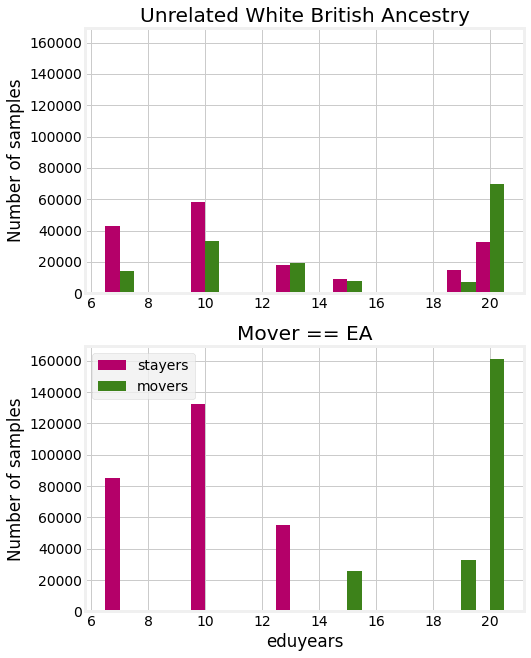

In [6]:
plt.style.use('fivethirtyeight')
f,(a1,a2) = plt.subplots(2,1,figsize=(7,10), facecolor = 'w', sharey = True)

#cls = ['tab:blue','tab:green']
cls = [[0.705,0,0.411],[0.24,0.51,0.1]]

edvals = np.unique(eduyears.val.tolist())
moverList = wba_movers
stayerList = wba_stayers

for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a1.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a1.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a1.set_title('Unrelated White British Ancestry')
#a1.set_xlabel('eduyears')
a1.set_ylabel('Number of samples')
a1.set_facecolor('w')


edvals = np.unique(eduyears.val.tolist())
moverList = eids_above14
stayerList = eids_below14
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a2.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0], label = 'stayers')
a2.bar(edval+0.25, num_movers, width = 0.5, color = cls[1], label = 'movers')
a2.legend()

a2.set_title('Mover == EA')
a2.set_xlabel('eduyears')
a2.set_ylabel('Number of samples')
a2.set_facecolor('w')
plt.show()

In [25]:
# with open('equalized_wba_movers.csv','w') as o:
#     for eid in equalized_movers:
#         o.write(str(eid) + ' ' + str(eid) + '\n')
# with open('equalized_wba_stayers.csv','w') as o:
#     for eid in equalized_stayers:
#         o.write(str(eid) + ' ' + str(eid) + '\n')

In [9]:
# let's remove collegers
eduyears_below18 = eduyears[eduyears.val<=18].eid.tolist()
print(len(eduyears))
print(len(eduyears_below18))

492398
298492


In [10]:
equalized_stayers_below18 = list(set(eduyears_below18) & set(equalized_stayers))
equalized_movers_below18 = list(set(eduyears_below18) & set(equalized_movers))

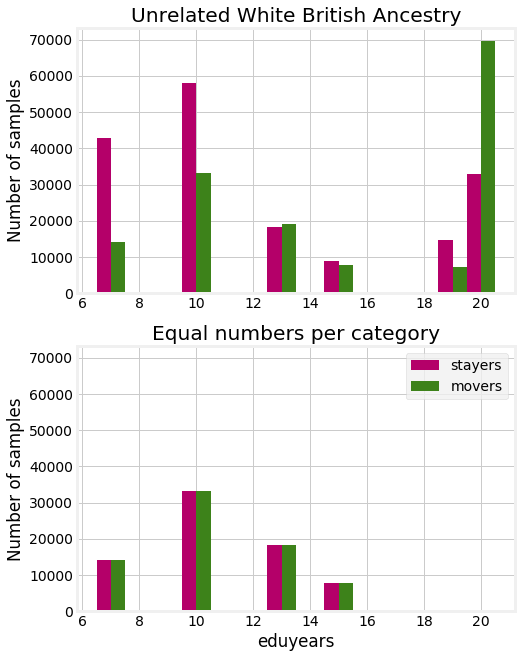

In [11]:
plt.style.use('fivethirtyeight')
f,(a1,a2) = plt.subplots(2,1,figsize=(7,10), facecolor = 'w', sharey = True)

#cls = ['tab:blue','tab:green']
cls = [[0.705,0,0.411],[0.24,0.51,0.1]]

edvals = np.unique(eduyears.val.tolist())
moverList = wba_movers
stayerList = wba_stayers

for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a1.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a1.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a1.set_title('Unrelated White British Ancestry')
#a1.set_xlabel('eduyears')
a1.set_ylabel('Number of samples')
a1.set_facecolor('w')


edvals = np.unique(eduyears.val.tolist())
moverList = equalized_movers_below18
stayerList = equalized_stayers_below18
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a2.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0], label = 'stayers')
a2.bar(edval+0.25, num_movers, width = 0.5, color = cls[1], label = 'movers')
a2.legend()

a2.set_title('Equal numbers per category')
a2.set_xlabel('eduyears')
a2.set_ylabel('Number of samples')
a2.set_facecolor('w')
plt.show()

In [12]:
# with open('equalized_wba_movers_below18.csv','w') as o:
#     for eid in equalized_movers_below18:
#         o.write(str(eid) + ' ' + str(eid) + '\n')
# with open('equalized_wba_stayers_below18.csv','w') as o:
#     for eid in equalized_stayers_below18:
#         o.write(str(eid) + ' ' + str(eid) + '\n')

In [11]:
# let's separate post-secondary eds
eduyears_below14 = eduyears[eduyears.val<=14].eid.tolist()
eduyears_above14 = eduyears[eduyears.val>=14].eid.tolist()
print(len(eduyears_above14))
print(len(eduyears_below14))

219711
272687


In [22]:
stayers_below14 = list(set(eduyears_below14)&set(wba_stayers))
movers_below14 = list(set(eduyears_below14)&set(wba_movers))
print(len(stayers_below14))
print(len(movers_below14))

118923
66614


In [23]:
# with open('stayers_below14.csv','w') as o:
#     for eid in stayers_below14:
#         o.write(str(eid) + ' ' + str(eid) + '\n')
# with open('movers_below14.csv','w') as o:
#     for eid in movers_below14:
#         o.write(str(eid) + ' ' + str(eid) + '\n')

In [17]:
# with open('eids_below14.csv','w') as o:
#     for eid in eduyears_below14:
#         o.write(str(eid) + ' ' + str(eid) + '\n')
# with open('eids_above14.csv','w') as o:
#     for eid in eduyears_above14:
#         o.write(str(eid) + ' ' + str(eid) + '\n')

### all-WBA (not unrelated WBA)

In [4]:
eduyears = pd.read_csv('../pheno/pheno_eduYears.csv',delimiter = ' ')
print(len(eduyears))
eduyears.head(2)

492398


,eid,eid.1,val
0,3609487,3609487,20
1,1194904,1194904,20


In [5]:
wba = pd.read_csv('../pheno/wba.txt', delimiter = ',')
wba_eids = wba[wba['22006-0.0']==1].eid.tolist()
print(len(wba_eids))
wba.head(5)

409629


,eid,22006-0.0
0,4865591,1.0
1,3706515,1.0
2,4925122,1.0
3,2075954,1.0
4,3699099,NaN


In [6]:
pob_por_migration = pd.read_csv('../00_csv_files/pob_por_migration.csv')
pob_por_migration.head(2)

,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042


In [7]:
all_movers = pob_por_migration[pob_por_migration.distances > 20000].eid.tolist()
all_stayers = pob_por_migration[pob_por_migration.distances <= 20000].eid.tolist()
all_wba_movers = list(set(all_movers)&set(wba_eids))
all_wba_stayers = list(set(all_stayers)&set(wba_eids))
print(len(all_wba_movers),len(all_wba_stayers))

174204 220262


In [26]:
# edvals = np.unique(eduyears.val.tolist())

# allwba_equalized_movers = []
# allwba_equalized_stayers = []

# for edval in edvals:
#     eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
#     movers_val = list(set(all_wba_movers)&set(eids_for_edval))
#     stayers_val = list(set(all_wba_stayers)&set(eids_for_edval))
    
#     # if fewer movers, sample from stayers
#     if len(movers_val) < len(stayers_val): 
#         np.random.shuffle(stayers_val)
#         stayers_keepers = stayers_val[:len(movers_val)]
#         movers_keepers = movers_val
#     # if fewer stayers, sample from movers
#     elif len(stayers_val) < len(movers_val): 
#         np.random.shuffle(movers_val)
#         movers_keepers = movers_val[:len(stayers_val)]
#         stayers_keepers = stayers_val
#     allwba_equalized_movers.extend(movers_keepers)
#     allwba_equalized_stayers.extend(stayers_keepers)

# print(len(allwba_equalized_movers), len(allwba_equalized_stayers))

133904 133904


In [8]:
with open('allwba_equalized_stayers.csv','r') as f:
    allwba_equalized_stayers = [int(x.rstrip().split()[0]) for x in f.readlines()]
with open('allwba_equalized_movers.csv','r') as f:
    allwba_equalized_movers = [int(x.rstrip().split()[0]) for x in f.readlines()]
print(len(allwba_equalized_stayers))
print(len(allwba_equalized_movers))

133904
133904


<ipython-input-10-3cc9613385ac>:39: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(True)


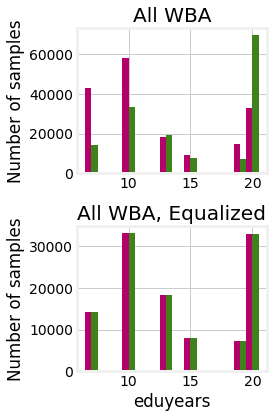

In [10]:
plt.style.use('fivethirtyeight')
f,(a1,a3) = plt.subplots(2,1,figsize=(4,6),facecolor='w')#,sharey=True)
#cls = ['tab:blue','tab:green']
cls = [[0.705,0,0.411],[0.24,0.51,0.1]]

edvals = np.unique(eduyears.val.tolist())
moverList = wba_movers
stayerList = wba_stayers
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a1.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a1.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a1.set_title('All WBA')
#a1.set_xlabel('eduyears')
a1.set_ylabel('Number of samples')
a1.set_facecolor('w')

edvals = np.unique(eduyears.val.tolist())
moverList = equalized_wba_movers
stayerList = equalized_wba_stayers
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a3.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a3.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a3.set_title('All WBA, Equalized')
a3.set_xlabel('eduyears')
a3.set_facecolor('w')
a3.set_ylabel('Number of samples')
plt.tight_layout(True)
plt.show()

In [10]:
# with open('allwba_equalized_stayers.csv','w') as o:
#     for eid in allwba_equalized_stayers:
#         o.write(str(eid) + ' ' + str(eid) + '\n')
# with open('allwba_equalized_movers.csv','w') as o:
#     for eid in allwba_equalized_movers:
#         o.write(str(eid) + ' ' + str(eid) + '\n')

### compare the variances between groups

In [22]:
def getStats(v):
    n = str(stats.describe(v).nobs)
    m = '{:1.1f}'.format(stats.describe(v).mean)
    v = '{:1.1f}'.format(stats.describe(v).variance)
    return [n,m,v]

In [26]:
ea_all_wba_stayers = eduyears[eduyears.eid.isin(all_wba_stayers)].val.values
ea_all_wba_movers = eduyears[eduyears.eid.isin(all_wba_movers)].val.values

ea_all_wba_eqstayers = eduyears[eduyears.eid.isin(allwba_equalized_stayers)].val.values
ea_all_wba_eqmovers = eduyears[eduyears.eid.isin(allwba_equalized_movers)].val.values

print('                  n      mean variance')
print('all WBA stayers: ', ' '.join(getStats(ea_all_wba_stayers)) )
print('all WBA movers:  ', ' '.join(getStats(ea_all_wba_movers)) )
print()
print('EQ  WBA stayers: ', ' '.join(getStats(ea_all_wba_eqstayers)) )
print('EQ  WBA movers:  ', ' '.join(getStats(ea_all_wba_eqmovers)) )

                  n      mean variance
all WBA stayers:  217875 12.4 23.8
all WBA movers:   173254 15.4 24.2

EQ  WBA stayers:  133904 14.0 23.1
EQ  WBA movers:   133904 14.0 23.1


#### analysis of EA-rarefied groups

In [14]:
movers_eq = [int(x.split()[0]) for x in open('equalized_wba_movers.csv','r').readlines()]
print('equalized movers:  ',len(movers_eq))
stayers_eq = [int(x.split()[0]) for x in open('equalized_wba_stayers.csv','r').readlines()]
print('equalized stayers: ',len(stayers_eq))

movers_all = [int(x.split()[0]) for x in open('wba_movers.csv','r').readlines()]
print('all movers: ',len(movers_all))
stayers_all = [int(x.split()[0]) for x in open('wba_stayers.csv','r').readlines()]
print('all stayers: ',len(stayers_all))

movers_bc = [int(x.split()[0]) for x in open('wba_bcmovers.csv','r').readlines()]
print('born-close movers: ',len(movers_bc))
stayers_bc = [int(x.split()[0]) for x in open('wba_bcstayers.csv','r').readlines()]
print('born-close stayers: ',len(stayers_bc))

equalized movers:   113550
equalized stayers:  113550
all movers:  152227
all stayers:  177519
born-close movers:  86908
born-close stayers:  172335


In [15]:
# compare phenotypes .... first, eduyears
pheno_eduyears = pd.read_csv('../pheno/pheno_eduYears.csv',delimiter = ' ')
pheno_eduyears.head(3)

,eid,eid.1,val
0,3609487,3609487,20
1,1194904,1194904,20
2,1391300,1391300,20


In [16]:
pheno_height = pd.read_csv('../pheno/pheno_height.csv',delimiter = ' ')
pheno_height.head(3)

,eid,eid.1,height
0,4194304,4194304,162.0
1,1048584,1048584,188.0
2,5242889,5242889,177.0


In [17]:
pheno_bmi = pd.read_csv('../pheno/pheno_bmi.csv',delimiter = ' ')
pheno_bmi.head(3)

,eid,eid2,bmi
0,4194304,4194304,28.9209
1,1048584,1048584,26.9353
2,5242889,5242889,27.7698


In [15]:
eduyears = dict(zip(pheno_eduyears.eid,pheno_eduyears.val))
height = dict(zip(pheno_height.eid,pheno_height.height))
bmi = dict(zip(pheno_bmi.eid,pheno_bmi.bmi))

In [27]:
from math import isnan
pheno_int = pd.read_csv('../00_csv_files/pheno_int.csv')
pheno_int.head(3)
sleepduration_nan = dict(zip(pheno_int.eid,pheno_int['Sleep duration']))
sleepduration = {k: sleepduration_nan[k] for k in sleepduration_nan if not isnan(sleepduration_nan[k])}

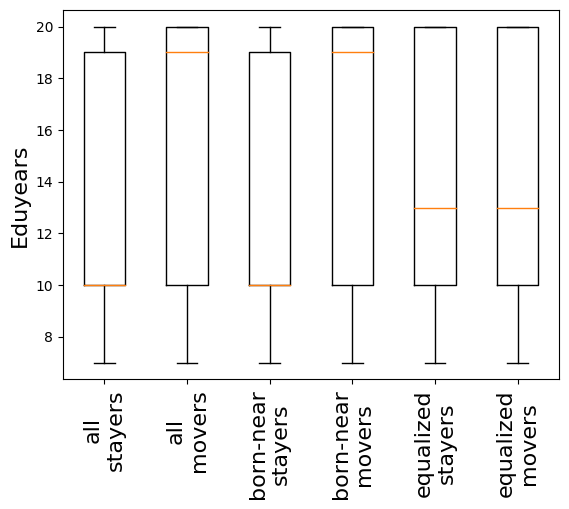

In [29]:
plt.style.use('default')
eduyears_stayers_all = [eduyears[x] for x in stayers_all if x in eduyears.keys()]
eduyears_movers_all = [eduyears[x] for x in movers_all if x in eduyears.keys()]
eduyears_stayers_bc = [eduyears[x] for x in stayers_bc if x in eduyears.keys()]
eduyears_movers_bc = [eduyears[x] for x in movers_bc if x in eduyears.keys()]
eduyears_stayers_eq = [eduyears[x] for x in stayers_eq if x in eduyears.keys()]
eduyears_movers_eq = [eduyears[x] for x in movers_eq if x in eduyears.keys()]
plt.boxplot([eduyears_stayers_all,eduyears_movers_all,eduyears_stayers_bc,eduyears_movers_bc,
            eduyears_stayers_eq,eduyears_movers_eq])
plt.xticks([1,2,3,4,5,6],
           ['all\nstayers','all\nmovers','born-near\nstayers','born-near\nmovers','equalized\nstayers','equalized\nmovers'],
          rotation = 90, fontsize=16)
plt.ylabel('Eduyears',fontsize = 16)
plt.show()

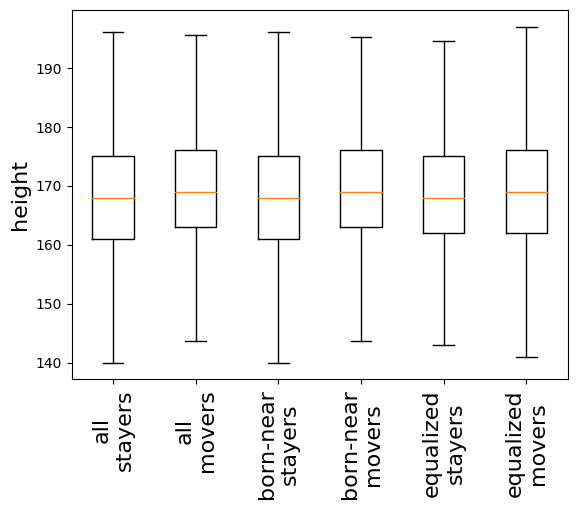

In [31]:
plt.style.use('default')
height_stayers_all = [height[x] for x in stayers_all if x in height.keys()]
height_movers_all = [height[x] for x in movers_all if x in height.keys()]
height_stayers_bc = [height[x] for x in stayers_bc if x in height.keys()]
height_movers_bc = [height[x] for x in movers_bc if x in height.keys()]
height_stayers_eq = [height[x] for x in stayers_eq if x in height.keys()]
height_movers_eq = [height[x] for x in movers_eq if x in height.keys()]
plt.boxplot([height_stayers_all,height_movers_all,height_stayers_bc,height_movers_bc,
            height_stayers_eq,height_movers_eq],showfliers = False)
plt.xticks([1,2,3,4,5,6],
           ['all\nstayers','all\nmovers','born-near\nstayers','born-near\nmovers','equalized\nstayers','equalized\nmovers'],
          rotation = 90, fontsize=16)
plt.ylabel('height',fontsize = 16)
plt.show()

In [40]:
print('mean all stayers:          ', '{:1.2f}'.format(np.mean(height_stayers_all) ) )
print('mean all movers:           ', '{:1.2f}'.format(np.mean(height_movers_all) ) )
print()
print('mean born-close stayers:   ', '{:1.2f}'.format(np.mean(height_stayers_bc) ) )
print('mean born-close movers:    ', '{:1.2f}'.format(np.mean(height_movers_bc) ) )
print()
print('mean EA-equalized stayers: ', '{:1.2f}'.format(np.mean(height_stayers_eq) ) )
print('mean EA-equalized movers:  ', '{:1.2f}'.format(np.mean(height_movers_eq) ) )

mean all stayers:           168.18
mean all movers:            169.59

mean born-close stayers:    168.17
mean born-close movers:     169.52

mean EA-equalized stayers:  168.55
mean EA-equalized movers:   169.22


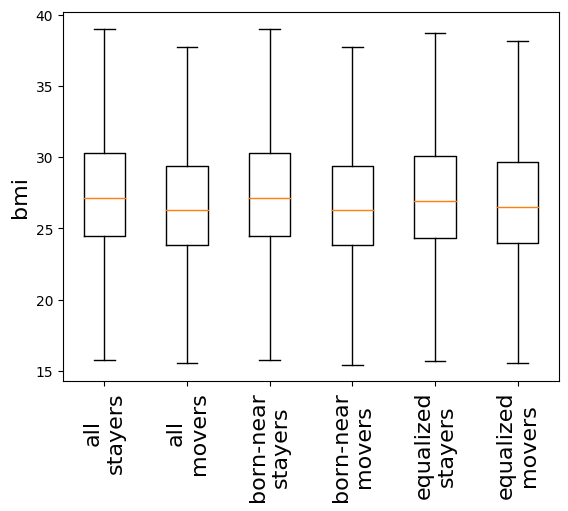

In [33]:
plt.style.use('default')
bmi_stayers_all = [bmi[x] for x in stayers_all if x in bmi.keys()]
bmi_movers_all = [bmi[x] for x in movers_all if x in bmi.keys()]
bmi_stayers_bc = [bmi[x] for x in stayers_bc if x in bmi.keys()]
bmi_movers_bc = [bmi[x] for x in movers_bc if x in bmi.keys()]
bmi_stayers_eq = [bmi[x] for x in stayers_eq if x in bmi.keys()]
bmi_movers_eq = [bmi[x] for x in movers_eq if x in bmi.keys()]
plt.boxplot([bmi_stayers_all,bmi_movers_all,bmi_stayers_bc,bmi_movers_bc,
            bmi_stayers_eq,bmi_movers_eq],showfliers = False)
plt.xticks([1,2,3,4,5,6],
           ['all\nstayers','all\nmovers','born-near\nstayers','born-near\nmovers','equalized\nstayers','equalized\nmovers'],
          rotation = 90, fontsize=16)
plt.ylabel('bmi',fontsize = 16)
plt.show()

In [41]:
print('mean all stayers:          ', '{:1.2f}'.format(np.mean(bmi_stayers_all) ) )
print('mean all movers:           ', '{:1.2f}'.format(np.mean(bmi_movers_all) ) )
print()
print('mean born-close stayers:   ', '{:1.2f}'.format(np.mean(bmi_stayers_bc) ) )
print('mean born-close movers:    ', '{:1.2f}'.format(np.mean(bmi_movers_bc) ) )
print()
print('mean EA-equalized stayers: ', '{:1.2f}'.format(np.mean(bmi_stayers_eq) ) )
print('mean EA-equalized movers:  ', '{:1.2f}'.format(np.mean(bmi_movers_eq) ) )

mean all stayers:           27.78
mean all movers:            26.98

mean born-close stayers:    27.78
mean born-close movers:     26.97

mean EA-equalized stayers:  27.60
mean EA-equalized movers:   27.20


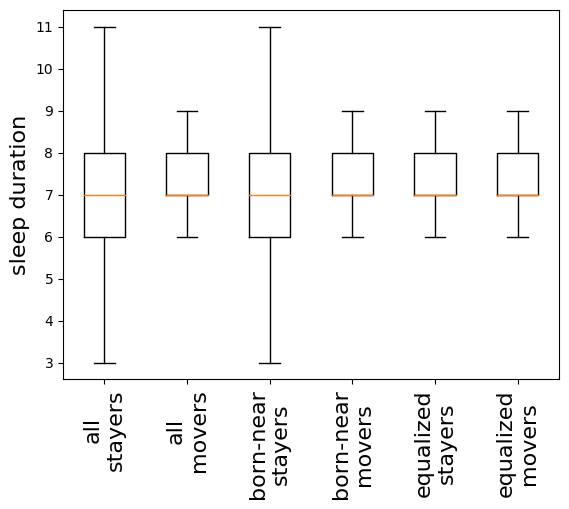

In [33]:
plt.style.use('default')
sleepduration_stayers_all = [sleepduration[x] for x in stayers_all if x in sleepduration.keys()]
sleepduration_movers_all = [sleepduration[x] for x in movers_all if x in sleepduration.keys()]
sleepduration_stayers_bc = [sleepduration[x] for x in stayers_bc if x in sleepduration.keys()]
sleepduration_movers_bc = [sleepduration[x] for x in movers_bc if x in sleepduration.keys()]
sleepduration_stayers_eq = [sleepduration[x] for x in stayers_eq if x in sleepduration.keys()]
sleepduration_movers_eq = [sleepduration[x] for x in movers_eq if x in sleepduration.keys()]

plt.boxplot([sleepduration_stayers_all,sleepduration_movers_all,sleepduration_stayers_bc,sleepduration_movers_bc,
            sleepduration_stayers_eq,sleepduration_movers_eq],showfliers = False)
plt.xticks([1,2,3,4,5,6],
           ['all\nstayers','all\nmovers','born-near\nstayers','born-near\nmovers','equalized\nstayers','equalized\nmovers'],
          rotation = 90, fontsize=16)
plt.ylabel('sleep duration',fontsize = 16)
plt.show()

In [30]:
print('mean all stayers:          ', '{:1.2f}'.format(np.mean(sleepduration_stayers_all) ) )
print('mean all movers:           ', '{:1.2f}'.format(np.mean(sleepduration_movers_all) ) )
print()
print('mean born-close stayers:   ', '{:1.2f}'.format(np.mean(sleepduration_stayers_bc) ) )
print('mean born-close movers:    ', '{:1.2f}'.format(np.mean(sleepduration_movers_bc) ) )
print()
print('mean EA-equalized stayers: ', '{:1.2f}'.format(np.mean(sleepduration_stayers_eq) ) )
print('mean EA-equalized movers:  ', '{:1.2f}'.format(np.mean(sleepduration_movers_eq) ) )

mean all stayers:           7.17
mean all movers:            7.18

mean born-close stayers:    7.17
mean born-close movers:     7.18

mean EA-equalized stayers:  7.17
mean EA-equalized movers:   7.17


# one QQplot for mover status GWAS, 
### with snps for EA, height, bmi, sleepduration . . . ?

In [2]:
fdir = 'moverstatus_wbabornclose_propcs40'
chrom = 1
fname = fdir + '/chr' + str(chrom) + '.all.glm.logistic'
chromDf = pd.read_csv(fname,delimiter = '\t')
chromDf.head(4)

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P
0,1,10616,1:10616_CCGCCGTTGCAAAGGCGCGCCG_C,C,CCGCCGTTGCAAAGGCGCGCCG,CCGCCGTTGCAAAGGCGCGCCG,ADD,256035,1.027620,0.059150,0.460601,0.645085
1,1,13110,rs540538026,A,G,A,ADD,256035,1.028050,0.020117,1.374980,0.169138
2,1,14933,rs199856693,A,G,A,ADD,256035,0.995934,0.022215,-0.183403,0.854482
3,1,16949,rs199745162,C,A,C,ADD,256035,0.983278,0.032059,-0.526029,0.598868


In [3]:
# convert z-stat to p-value ... looks like I have it right.
z = 0.460601
print((1-stats.norm.cdf(abs(z)))*2)
z = 1.374980
print((1-stats.norm.cdf(abs(z)))*2)
z = -0.183403
print((1-stats.norm.cdf(abs(z)))*2)

0.6450848940218472
0.1691376452785469
0.8544818221324972


In [3]:
# have ea_snplist, height_snplist, bmi_snplist, sleepduration_snplist
# need to get their pvals
# make a dictionary of them all!
pvalDict = {}
#fdir = 'mover_status'
#fdir = 'mover_status_bornclose'
fdir = 'moverstatus_wbabornclose_propcs40'
for chrom in np.arange(1,23):
    fname = fdir + '/chr' + str(chrom) + '.all.glm.logistic'
    chromDf = pd.read_csv(fname,delimiter = '\t')
    pvalDict.update(dict(zip(chromDf.ID.values, chromDf.P.values)))

In [4]:
pvals = np.array(list(pvalDict.values()))
print(len(pvals))
#print('removed ',len(pvalDict.values()) - len(pvals))

11102230


In [5]:
print(len(pvals))
pvals_no_nan = pvals[np.where(np.isnan(pvals) == False)]
print(len(pvals_no_nan))

11102230
11100786


In [6]:
sorted_pvals = sorted(pvals_no_nan)

In [8]:
# downsample to reduce size of array`
#(source_list[i] for i in xrange(0, len(source_list), 10))
#smaller_sorted_pvals = list(sorted_pvals[i] for i in range(0, len(sorted_pvals), 1000))

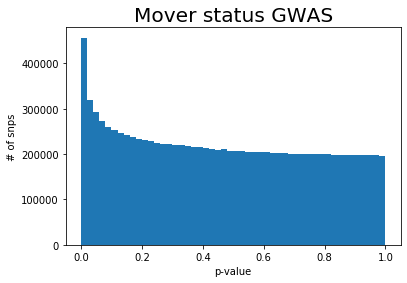

In [8]:
plt.hist(sorted_pvals,50)
plt.style.use('fivethirtyeight')
plt.ylabel('# of snps')
plt.xlabel('p-value')
plt.title('Mover status GWAS')
plt.show()

In [9]:
print(sorted_pvals[:5])

[1.98365e-14, 2.08918e-14, 2.43245e-14, 2.79938e-14, 2.80005e-14]


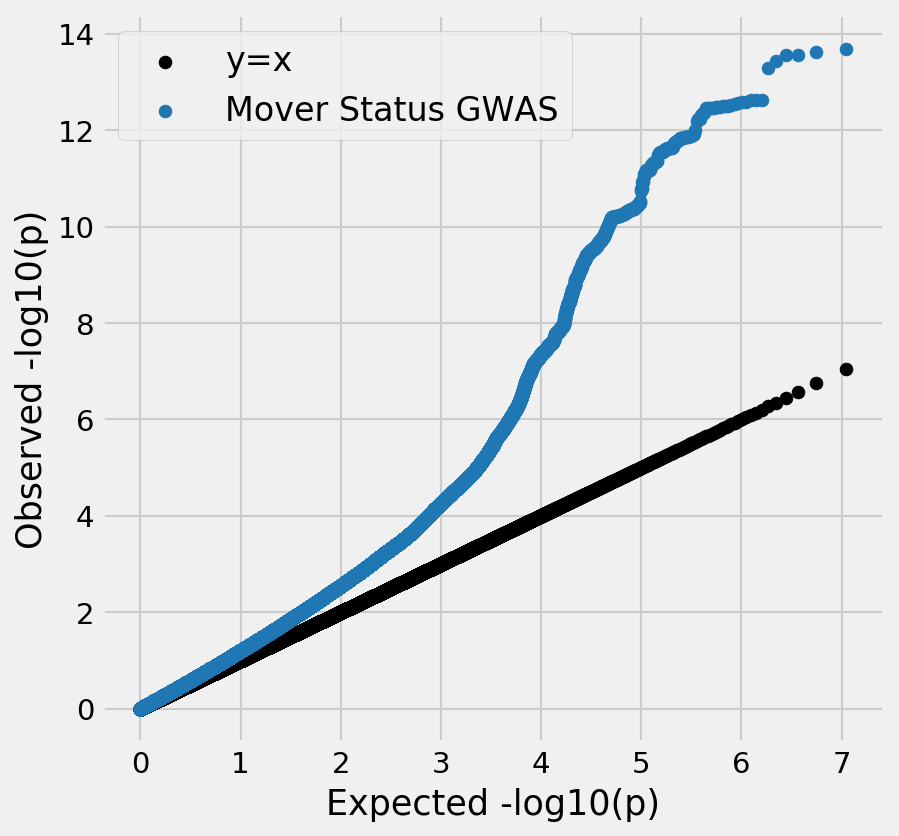

In [15]:
qqplot([sorted_pvals],['Mover Status GWAS'],(6,6))

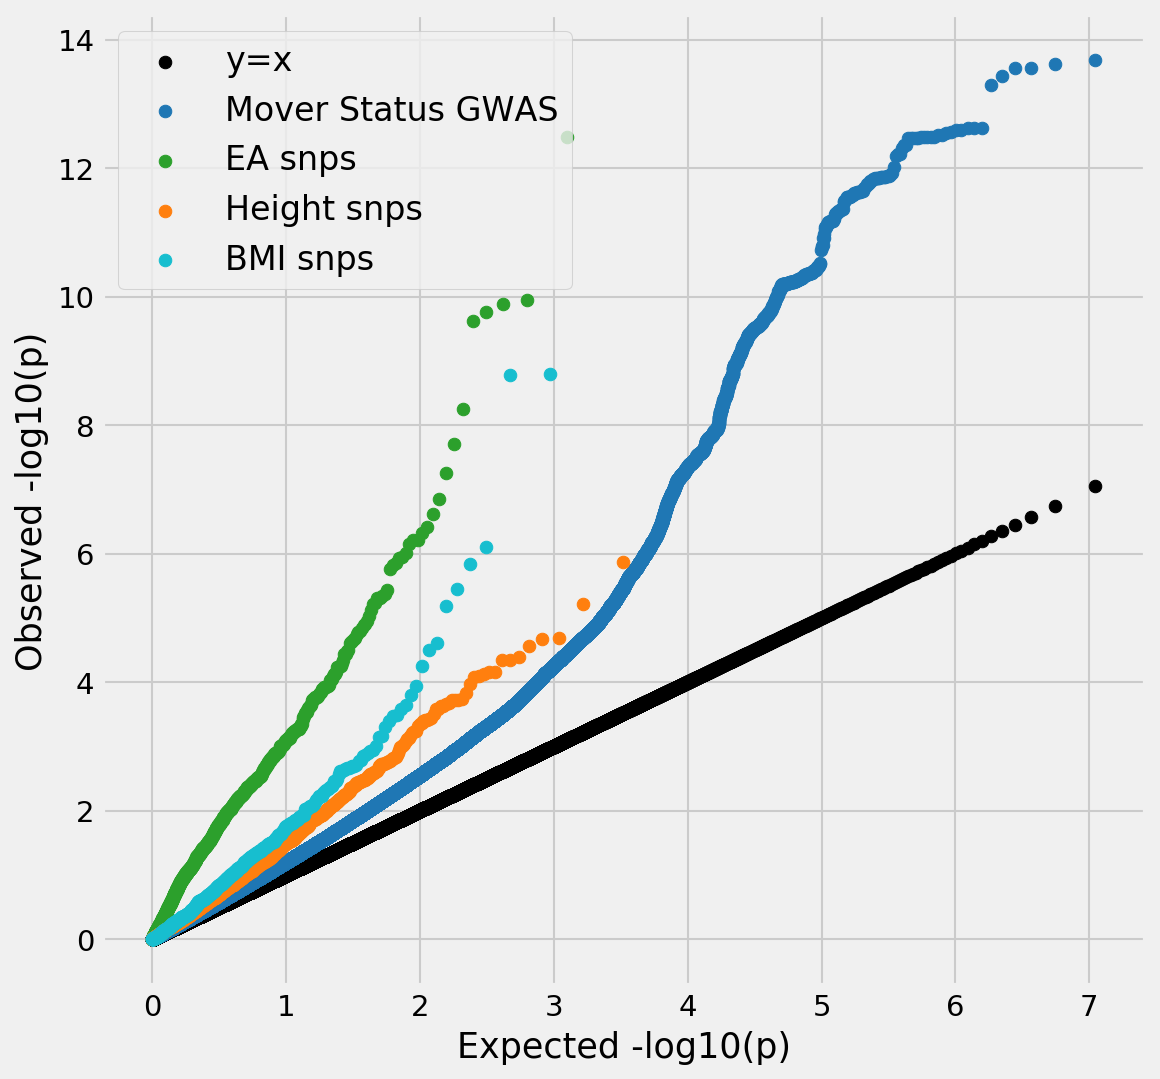

In [17]:
ea_pvals = [pvalDict[x] for x in ea_snplist if x in pvalDict.keys()]
height_pvals = [pvalDict[x] for x in height_snplist if x in pvalDict.keys()]
bmi_pvals = [pvalDict[x] for x in bmi_snplist if x in pvalDict.keys()]
qqplot([sorted_pvals,ea_pvals,height_pvals,bmi_pvals],['Mover Status GWAS','EA snps','Height snps','BMI snps'],(8,8))

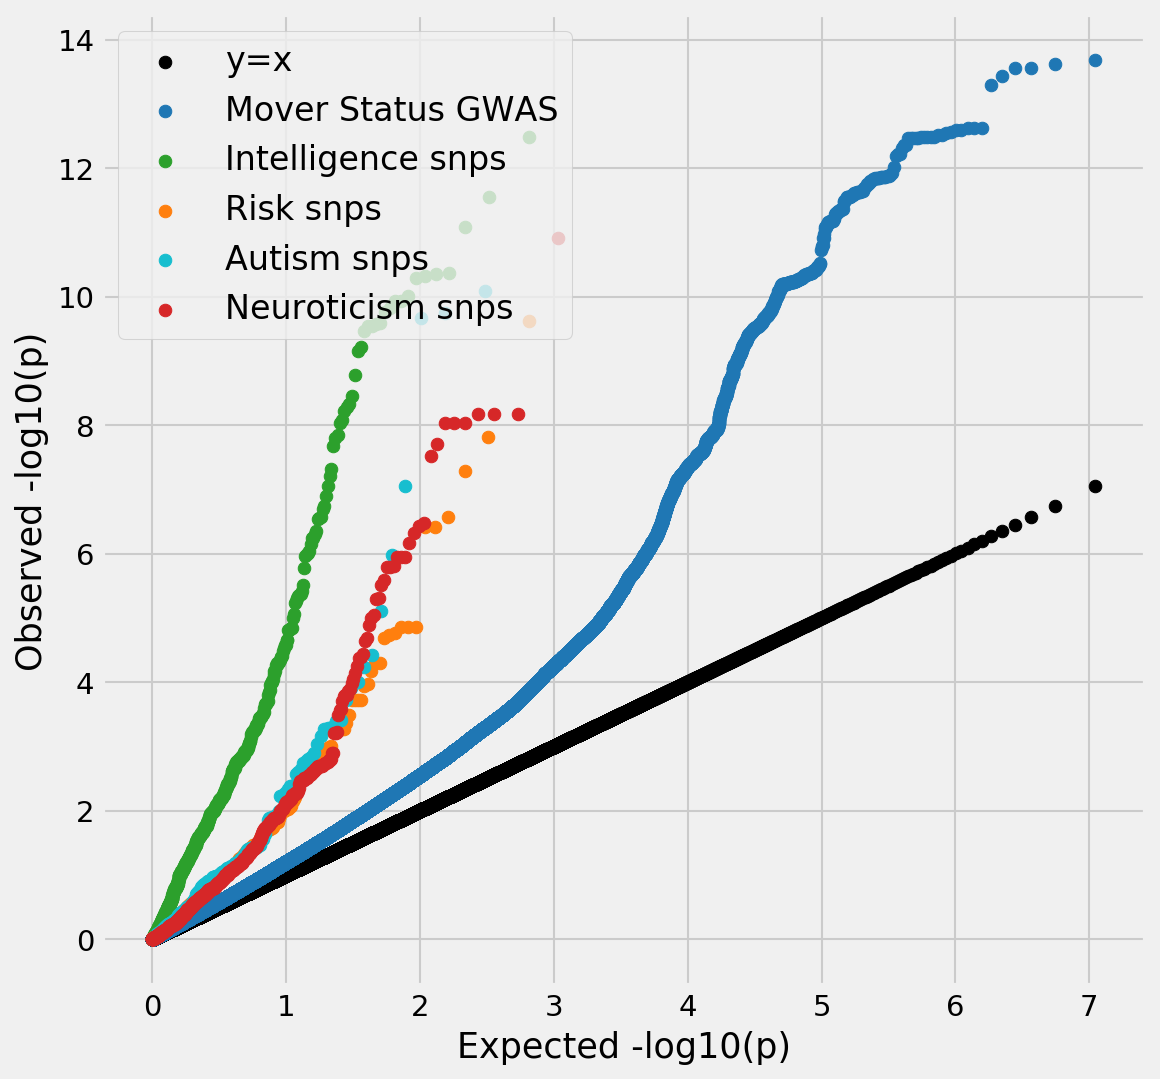

In [18]:
#HERE
intelligence_pvals = [pvalDict[x] for x in intelligence_snps if x in pvalDict.keys()]
neuroticism_pvals = [pvalDict[x] for x in neuroticism_snps if x in pvalDict.keys()]
risk_pvals = [pvalDict[x] for x in risk_snps if x in pvalDict.keys()]
smoking_pvals = [pvalDict[x] for x in smoking_snps if x in pvalDict.keys()]
autism_pvals = [pvalDict[x] for x in autism_snps if x in pvalDict.keys()]
loneliness_pvals = [pvalDict[x] for x in loneliness_snps if x in pvalDict.keys()]
qqplot([sorted_pvals,intelligence_pvals,risk_pvals,autism_pvals,neuroticism_pvals],
       ['Mover Status GWAS','Intelligence snps','Risk snps','Autism snps','Neuroticism snps'],(8,8))

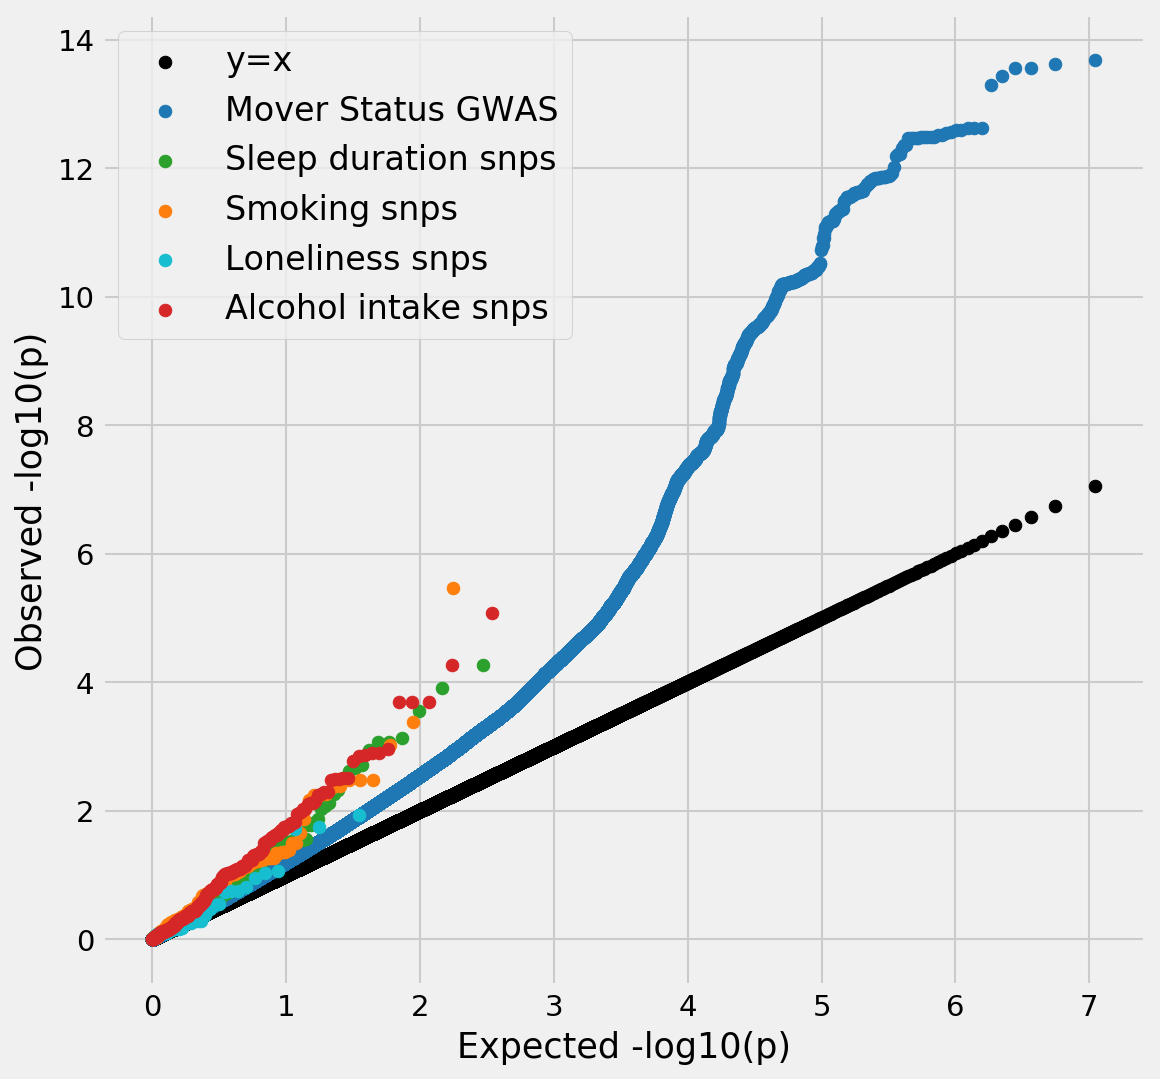

In [20]:
#HERE
sleep_pvals = [pvalDict[x] for x in sleepduration_snplist if x in pvalDict.keys()]
smoking_pvals = [pvalDict[x] for x in smoking_snps if x in pvalDict.keys()]
loneliness_pvals = [pvalDict[x] for x in loneliness_snps if x in pvalDict.keys()]
alcohol_pvals = [pvalDict[x] for x in alcohol_snps if x in pvalDict.keys()]
qqplot([sorted_pvals,sleep_pvals,smoking_pvals,loneliness_pvals,alcohol_pvals],
       ['Mover Status GWAS','Sleep duration snps','Smoking snps','Loneliness snps','Alcohol intake snps'],(8,8))

#### Genomic Control

In [13]:
# find median pvalue
median_pval = np.median(sorted_pvals)
print(median_pval)

0.4494


In [16]:
# find chisq for this median pvalue
med_chisqs = stats.chi2.isf(median_pval, 1)
print(med_chisqs) # 0.572 when I did ALL of the pvals, tc.

0.5721647056821395


In [17]:
# calculate lambda = genomic inflation factor = med_
gif_lambda = med_chisqs / 0.675**2
print(gif_lambda) # was 1.256 when I did ALL of the pvals, etc. 

1.2557798752968767


In [22]:
# import pickle
# pickle.dump([corrected_chisqs,corrected_pvals],open('genome_inflation.p','wb')) # <=== all-pval version

In [33]:
import pickle
[corrected_chisqs,corrected_pvals] = pickle.load(open('genome_inflation.p','rb')) # <=== all-pval version
print(len(corrected_pvals))
corrected_pvals = np.array(corrected_pvals)
corrected_pvals_no_nan = corrected_pvals[np.where(np.isnan(corrected_pvals) == False)]
print(len(corrected_pvals_no_nan))

11102230
11100786


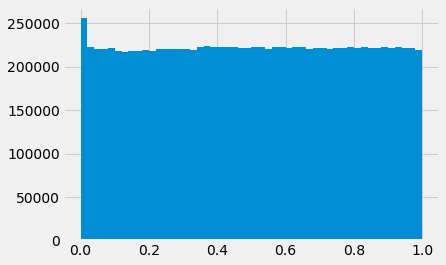

In [34]:
plt.hist(corrected_pvals_no_nan,50)
plt.show()

In [35]:
sorted_corrected_pvals = sorted(corrected_pvals_no_nan)
# downsample to reduce size of array
#(source_list[i] for i in xrange(0, len(source_list), 10))
smaller_sorted_corrected_pvals = list(sorted_pvals[i] for i in range(0, len(sorted_pvals), 1000))

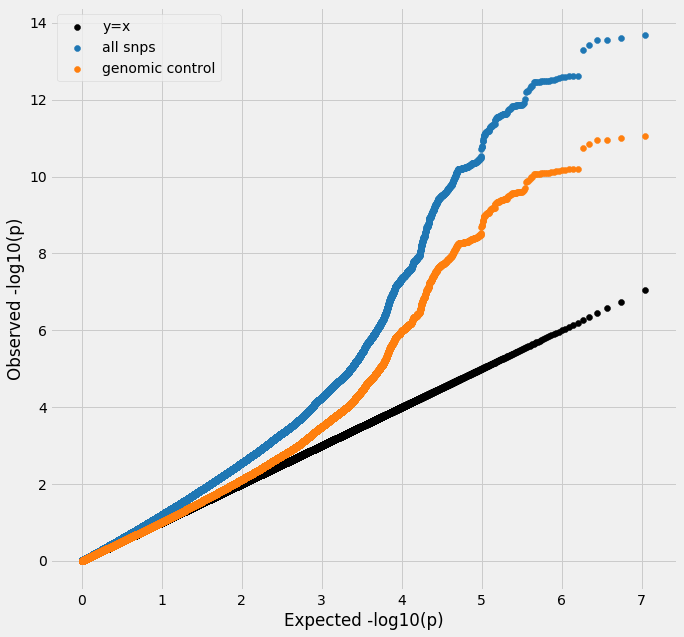

In [40]:
qqplot([sorted_pvals, sorted_corrected_pvals],['all snps','genomic control'], (10,10))

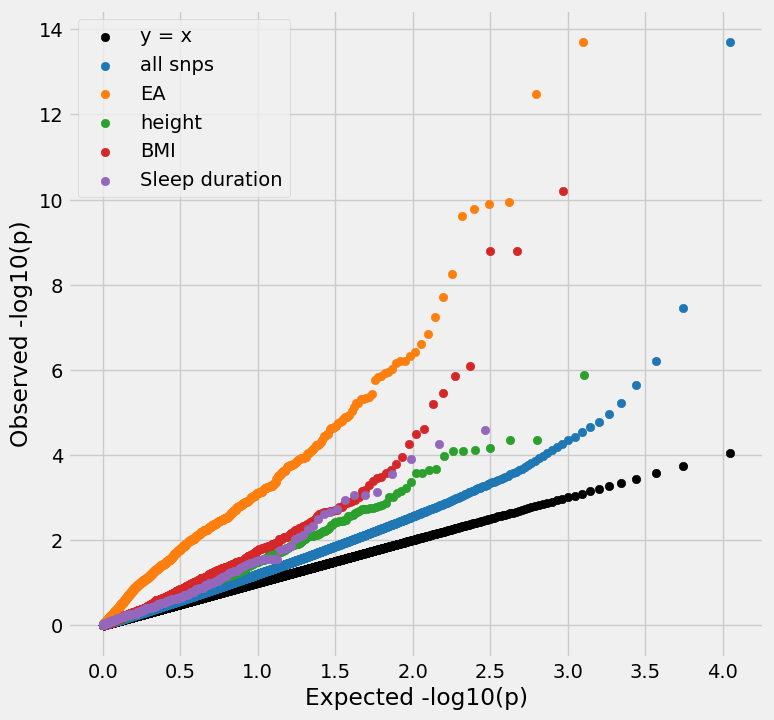

In [42]:
ea_pvals = [pvalDict[x] for x in ea_snplist if x in pvalDict.keys()]
height_pvals = [pvalDict[x] for x in height_snplist if x in pvalDict.keys()]
bmi_pvals = [pvalDict[x] for x in bmi_snplist if x in pvalDict.keys()]
sleepduration_pvals = [pvalDict[x] for x in sleepduration_snplist if x in pvalDict.keys()]

plt.style.use('fivethirtyeight')
all_pvals = [ea_pvals,height_pvals,bmi_pvals,sleepduration_pvals]
phenotypes = ['EA','height','BMI','Sleep duration']
cols = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

f,a = plt.subplots(1,1,figsize=(8,8))

a.scatter(log_yx_pvals,log_yx_pvals, c = 'k', label = 'y = x') 
a.scatter(log_yx_pvals,log_all_pvals, c = cols[0], label = 'all snps')

for i,pv in enumerate(all_pvals):
    sorted_pvals = sorted(-np.log10(pv))
    uniform_pvals = np.linspace(0,1,len(sorted_pvals))
    
    # remove first element (cannot do log10(0))
    uniform_pvals = uniform_pvals[1:]
    sorted_pvals = sorted_pvals[1:]
    log_uniform_pvals = sorted(-np.log10(uniform_pvals))
    
    # plot
    a.scatter(log_uniform_pvals,sorted_pvals,c=cols[i+1],label=phenotypes[i])
    
   
a.set_xlabel('Observed -log10(p)')
a.set_xlabel('Expected -log10(p)')
plt.legend(loc='best',fontsize=14)
plt.show()

In [19]:
# getting standard snp set for alcohol consumption
alcohol_lead_snps = pd.read_excel('gwas_catalog_alcoholconsumption.xlsx', 
                                  sheet_name = 'Sheet1',
                                  header = 0, index_col = None )

alcohol_snplist = alcohol_lead_snps.snp.tolist()
print(len(alcohol_snplist))
print(alcohol_snplist[:5])
alcohol_lead_snps.head(5)

1249
['rs12404679', 'rs10916143', 'rs35769988', 'rs6951271', 'rs551692767']


,snp,allele,p,PvalAnnotation,RAF,OR,BETA,CI,Gene,Trait,Traits,Accession,Location
0,rs12404679,C,4 x 10-7,NaN,0.937,-,0.7003 unit increase,[0.43-0.97],"RNU6-880P, RF00026",Alcohol consumption (max-drinks),alcohol consumption measurement,GCST005441,1:42992787
1,rs10916143,A,8 x 10-7,NaN,0.6305,-,0.2458 unit decrease,[0.15-0.34],LINC01641,Alcohol consumption (max-drinks),alcohol consumption measurement,GCST005441,1:227427047
2,rs35769988,A,9 x 10-6,NaN,0.4075,-,0.2141 unit decrease,[0.12-0.31],IGFBP7,Alcohol consumption (max-drinks),alcohol consumption measurement,GCST005441,4:57050723
3,rs6951271,A,6 x 10-6,NaN,0.645,-,0.2306 unit decrease,[0.13-0.33],"TRBV29-1, PGBD4P1",Alcohol consumption (max-drinks),alcohol consumption measurement,GCST005441,7:142726593
4,rs551692767,C,2 x 10-6,NaN,0.277,-,0.3431 unit increase,[0.2-0.49],LAMC3,Alcohol consumption (max-drinks),alcohol consumption measurement,GCST005441,9:131051366


In [18]:
# getting standard snp set for intelligence
intelligence_lead_snps = pd.read_excel('gwas_catalog_intelligence.xlsx', 
                                  sheet_name = 'Sheet1',
                                  header = 0, index_col = None )

intelligence_snplist = intelligence_lead_snps.snp.tolist()
print(len(intelligence_snplist))
print(intelligence_snplist[:5])
intelligence_lead_snps.head(5)

2729
['rs10922924', 'rs16947526', 'rs9982370', 'rs10995170', 'rs7792596']


,snp,allele,p,PvalAnnotation,RAF,OR,BETA,CI,Gene,Trait,Traits,Accession,Location
0,rs10922924,?,1 x 10-6,NaN,NR,-,-,-,LINC02609,General cognitive ability,intelligence,GCST002694,1:90787306
1,rs16947526,?,1 x 10-6,NaN,NR,-,-,-,"FA2H, AC009132.1",General cognitive ability,intelligence,GCST002694,16:74826658
2,rs9982370,?,1 x 10-6,NaN,NR,-,-,-,ERG,General cognitive ability,intelligence,GCST002694,21:38493931
3,rs10995170,?,3 x 10-7,(High intelligence),NR,-,4.42 unit increase,[2.77-6.07],"ZNF365, AC024598.1",Intelligence,intelligence,GCST001428,10:62463624
4,rs7792596,?,6 x 10-7,(High intelligence),NR,-,4.13 unit increase,[2.52-5.74],AC002074.1,Intelligence,intelligence,GCST001428,7:94380322


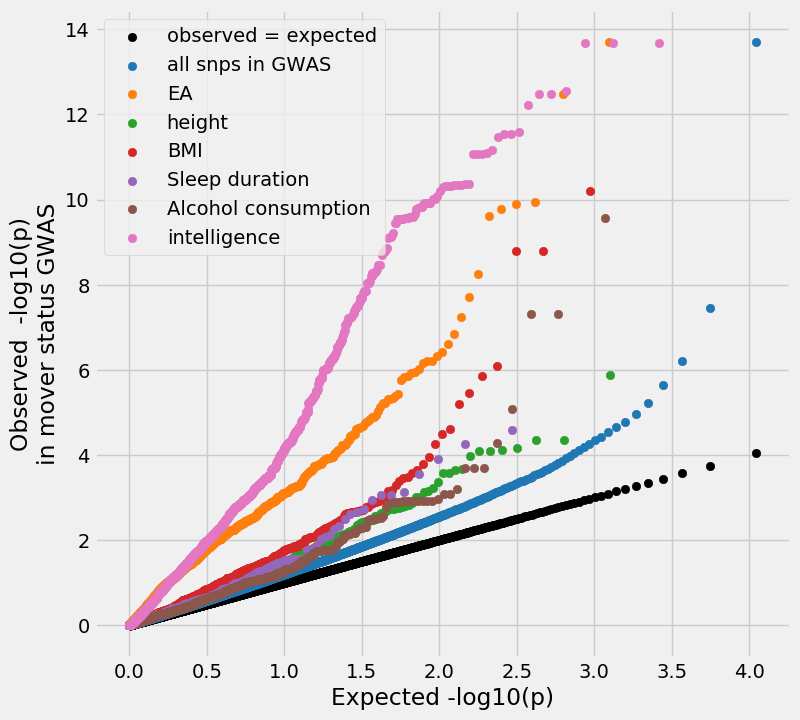

In [45]:
ea_pvals = [pvalDict[x] for x in ea_snplist if x in pvalDict.keys()]
height_pvals = [pvalDict[x] for x in height_snplist if x in pvalDict.keys()]
bmi_pvals = [pvalDict[x] for x in bmi_snplist if x in pvalDict.keys()]
sleepduration_pvals = [pvalDict[x] for x in sleepduration_snplist if x in pvalDict.keys()]
alcohol_pvals = [pvalDict[x] for x in alcohol_snplist if x in pvalDict.keys()]
intelligence_pvals = [pvalDict[x] for x in intelligence_snplist if x in pvalDict.keys()]

plt.style.use('fivethirtyeight')
all_pvals = [ea_pvals,height_pvals,bmi_pvals,sleepduration_pvals,alcohol_pvals,intelligence_pvals]
phenotypes = ['EA','height','BMI','Sleep duration','Alcohol consumption','intelligence']
cols = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

f,a = plt.subplots(1,1,figsize=(8,8))

a.scatter(log_yx_pvals,log_yx_pvals, c = 'k' , label = 'observed = expected')  
a.scatter(log_yx_pvals,log_all_pvals, c = cols[0], label = 'all snps in GWAS')

for i,pv in enumerate(all_pvals):

    sorted_pvals = sorted(-np.log10(pv))
    uniform_pvals = np.linspace(0,1,len(sorted_pvals))
    
    # remove first element (cannot do log10(0))
    uniform_pvals = uniform_pvals[1:]
    sorted_pvals = sorted_pvals[1:]
    log_uniform_pvals = sorted(-np.log10(uniform_pvals))
    
    # plot!
    a.scatter(log_uniform_pvals,sorted_pvals,c=cols[i+1],label=phenotypes[i])

a.set_ylabel('Observed  -log10(p)\nin mover status GWAS')
a.set_xlabel('Expected -log10(p)')
plt.legend(loc='best',fontsize=14)
plt.show()

In [38]:
# gwas_catalog = pd.read_csv('gwas_catalog_download.tsv',delimiter = '\t')
# gwas_catalog.head(3)

In [39]:
# gwas_catalog.columns.values

In [40]:
# newcols = ['STUDY', 'DISEASE/TRAIT','CHR_ID', 'CHR_POS',
#         'STRONGEST SNP-RISK ALLELE',
#        'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG',
#        'P-VALUE (TEXT)', 'OR or BETA', '95% CI (TEXT)',
#        'PLATFORM [SNPS PASSING QC]', 'CNV']

In [41]:
# new_gc = gwas_catalog[newcols]
# new_gc.head(3)

In [33]:
# dt = [x.lower() for x in new_gc['DISEASE/TRAIT'].tolist()]

In [42]:
# new_gc['DISEASE/TRAIT'] = dt
# new_gc.head(3)

In [43]:
# new_gc.to_csv('gwas_catalog_pruned.tsv',sep='\t',index=False)

In [7]:
gwas_catalog = pd.read_csv('gwas_catalog_pruned.tsv',delimiter = '\t')
traits = list(set(gwas_catalog['DISEASE/TRAIT'].tolist()))
gwas_catalog_snps = [x.split('-')[0] for x in gwas_catalog['STRONGEST SNP-RISK ALLELE'].tolist()]
gwas_catalog_chr = gwas_catalog.CHR_ID.tolist()
gwas_catalog_pos = gwas_catalog.CHR_POS.tolist()
chrom_positions = [str(gwas_catalog_chr[i]) + ':' + str(pos) for i,pos in enumerate(gwas_catalog_pos)]
gwas_catalog_positions = dict(zip(gwas_catalog_snps,chrom_positions))
gwas_catalog.head(3)

,STUDY,DISEASE/TRAIT,CHR_ID,CHR_POS,STRONGEST SNP-RISK ALLELE,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,Identification of novel genetic markers associ...,systemic sclerosis,6,32441753,rs3129882-?,0.44,2E-27,26.69897,(ATA positive),2.17,[1.88-2.50],Illumina [NR] (imputed),N
1,Identification of novel genetic markers associ...,systemic sclerosis,6,33075103,rs987870-?,0.15,2E-20,19.69897,(ATA positive),2.09,[1.78-2.45],Illumina [NR] (imputed),N
2,Identification of novel genetic markers associ...,systemic sclerosis,6,32623148,rs3129763-?,0.25,1E-11,11.00000,(ATA positive),1.65,[1.42-1.91],Illumina [NR] (imputed),N


In [8]:
smoking = ['smoking behaviour','ever smoking']
smokingTraits = []
for s in smoking:
    smokingTraits.extend([x for x in traits if s in x])
print(smokingTraits)
smokingTraits = smokingTraits[2:4]
print(smokingTraits)
smoking_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(smokingTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
smoking_snps = [x.split('-')[0] for x in smoking_snps]
print(len(smoking_snps))
print(smoking_snps[:5])

['smoking behaviour (maximum cigarettes in a 24 hour period)', 'waist circumference adjusted for bmi (adjusted for smoking behaviour)', 'smoking behaviour (cigarettes smoked per day)', 'waist-to-hip ratio adjusted for bmi (adjusted for smoking behaviour)', 'bmi (adjusted for smoking behaviour)', 'waist-to-hip circumference ratio (ever vs never smoking interaction)', 'body mass index (ever vs never smoking interaction)']
['smoking behaviour (cigarettes smoked per day)', 'waist-to-hip ratio adjusted for bmi (adjusted for smoking behaviour)']
185
['rs1372626', 'rs10991437', 'rs10991437', 'rs2371767', 'rs2371767']


In [9]:
autism = ['autism','Autism']
autismTraits = [x for x in traits if 'autism' in x]
print(autismTraits)
autism_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(autismTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
autism_snps = [x.split('-')[0] for x in autism_snps]
print(len(autism_snps))
print(autism_snps[:5])

['restricted and repetitive behaviours in autism spectrum disorder', 'autism and educational attainment (mtag)', 'autism spectrum disorder', 'obsessive-compulsive disorder or autism spectrum disorder', 'autism spectrum disorder or schizophrenia', 'autism and schizophrenia (mtag)', 'autism and major depressive disorder (mtag)', 'autism', 'autism spectrum disorder-related traits', 'autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)']
486
['rs4141463', 'rs7142002', 'rs1533087', 'rs1107592', 'rs6602217']


In [10]:
risk = ['risk-taking','adventurousness','risk tolerance']
riskTraits = []
for s in risk:
    riskTraits.extend([x for x in traits if s in x])
print(riskTraits)

risk_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(riskTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
risk_snps = [x.split('-')[0] for x in risk_snps]
print(len(risk_snps))
print(risk_snps[:5])

['risk-taking tendency (4-domain principal component model)', 'self-reported risk-taking behaviour', 'adventurousness', 'general risk tolerance (mtag)']
661
['rs62250759', 'rs560977020', 'rs2304681', 'rs542809491', 'rs9841382']


In [13]:
alcohol = ['drinks per week','max-drinks']
alcoholTraits = []
for s in alcohol:
    alcoholTraits.extend([x for x in traits if s in x])
print(alcoholTraits)

alcohol_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(alcoholTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
alcohol_snps = [x.split('-')[0] for x in alcohol_snps]
print(len(alcohol_snps))
print(alcohol_snps[:5])

#print(len(set(alcohol_snps)&set(alcohol_lead_snps))) # 0 .... strange?

['alcohol consumption (drinks per week) (mtag)', 'alcohol consumption (drinks per week)', 'alcohol consumption (max-drinks)']
361
['rs6882716', 'rs7928758', 'rs671', 'rs780094', 'rs11940694']


In [14]:
intelligence = ['intelligence','cognitive ability','cognitive ability (mtag)','extremely high intelligence']
intelligenceTraits = []
for s in intelligence:
    intelligenceTraits.extend([x for x in traits if s == x])
print(intelligenceTraits)

intelligence_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(intelligenceTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
intelligence_snps = [x.split('-')[0] for x in intelligence_snps]
intelligence_snps = list(set(intelligence_snps))
print(len(intelligence_snps))
print(intelligence_snps[:5])

#print(len(set(intelligence_snps)&set(intelligence_lead_snps))) # 0 .... strange?

['intelligence', 'cognitive ability', 'cognitive ability (mtag)', 'extremely high intelligence']
660
['rs4720485', 'rs6927268', 'rs7623659', 'rs6801153', 'rs35792732']


In [15]:
sleep = ['sleep duration']
sleepTraits = []
for s in sleep:
    sleepTraits.extend([x for x in traits if s in x])
print(sleepTraits)
sleepTraits = sleepTraits[1:]
print(sleepTraits)

sleep_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(sleepTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
sleep_snps = [x.split('-')[0] for x in sleep_snps]
print(len(sleep_snps))
print(sleep_snps[:5])

#print(len(set(sleep_snps)&set(sleepduration_lead_snps))) # 0 .... strange?

['hypertension risk in short sleep duration', 'sleep duration (short sleep)', 'sleep duration (long sleep)', 'sleep duration (oversleepers vs undersleepers)', 'sleep duration']
['sleep duration (short sleep)', 'sleep duration (long sleep)', 'sleep duration (oversleepers vs undersleepers)', 'sleep duration']
223
['rs62158211', 'rs17190618', 'rs1380703', 'rs62158211', 'rs1380703']


In [16]:
lonelinessTraits = ['loneliness']

loneliness_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(lonelinessTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
loneliness_snps = [x.split('-')[0] for x in loneliness_snps]
print(len(loneliness_snps))
print(loneliness_snps[:5])

37
['rs76554764', 'rs34656763', 'rs116256240', 'rs79210778', 'rs77766537']


In [17]:
neuroticismTraits = ['neuroticism']

neuroticism_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(neuroticismTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
neuroticism_snps = [x.split('-')[0] for x in neuroticism_snps]
print(len(neuroticism_snps))
print(neuroticism_snps[:5])

1107
['rs6981523', 'rs9611519', 'rs10172965', 'rs10244364', 'rs10406374']


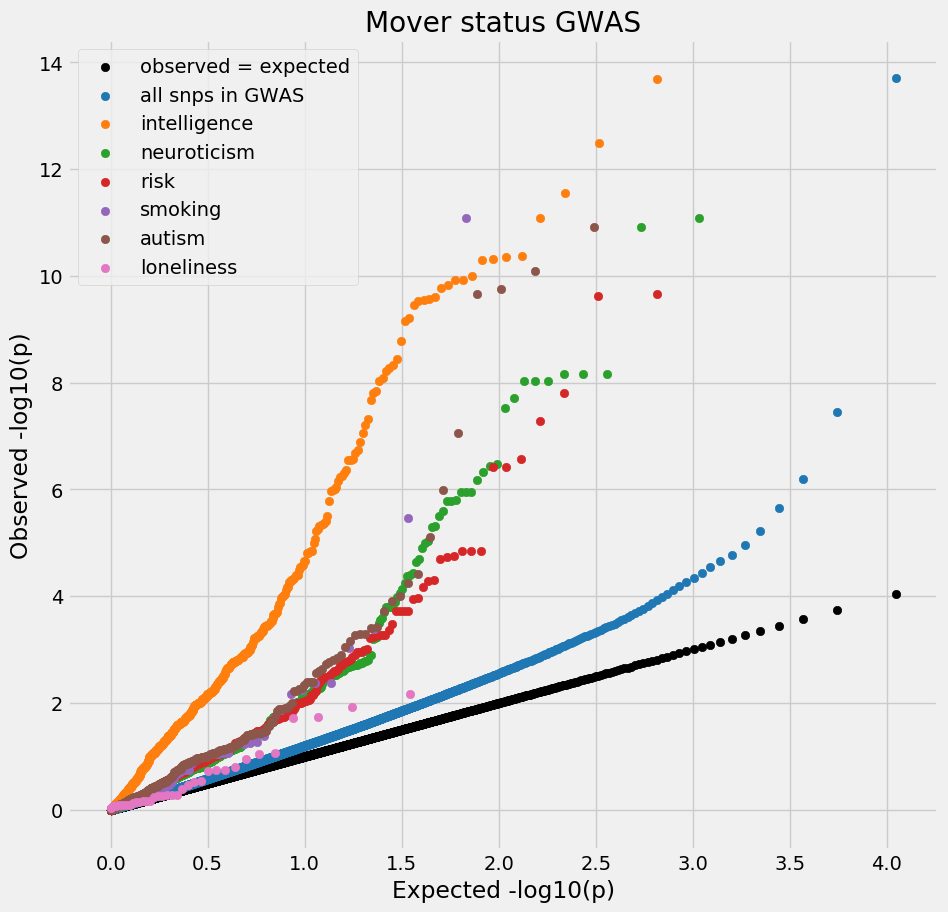

In [55]:
intelligence_pvals = [pvalDict[x] for x in intelligence_snps if x in pvalDict.keys()]
neuroticism_pvals = [pvalDict[x] for x in neuroticism_snps if x in pvalDict.keys()]
risk_pvals = [pvalDict[x] for x in risk_snps if x in pvalDict.keys()]
smoking_pvals = [pvalDict[x] for x in smoking_snps if x in pvalDict.keys()]
autism_pvals = [pvalDict[x] for x in autism_snps if x in pvalDict.keys()]
loneliness_pvals = [pvalDict[x] for x in loneliness_snps if x in pvalDict.keys()]

plt.style.use('fivethirtyeight')
all_pvals = [intelligence_pvals, neuroticism_pvals,risk_pvals,smoking_pvals,autism_pvals,loneliness_pvals]
phenotypes = ['intelligence','neuroticism','risk','smoking','autism','loneliness']

cols = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
        'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

f,a = plt.subplots(1,1,figsize=(10,10))

a.scatter(log_yx_pvals,log_yx_pvals, c = 'k' , label = 'observed = expected')  
a.scatter(log_yx_pvals,log_all_pvals, c = cols[0], label = 'all snps in GWAS')

for i,pv in enumerate(all_pvals):
    sorted_pvals = sorted(-np.log10(pv))
    uniform_pvals = np.linspace(0,1,len(sorted_pvals))
    
    # remove first element (cannot do log10(0))
    uniform_pvals = uniform_pvals[1:]
    sorted_pvals = sorted_pvals[1:]
    log_uniform_pvals = sorted(-np.log10(uniform_pvals))
    
    # plot!
    a.scatter(log_uniform_pvals,sorted_pvals,c=cols[i+1],label=phenotypes[i])

a.set_ylabel('Observed -log10(p)')
a.set_xlabel('Expected -log10(p)')
plt.legend(loc='upper left',fontsize=14)
plt.title('Mover status GWAS')
plt.show()

In [114]:
random_2k = np.random.choice(allSnps,2000,replace=False)

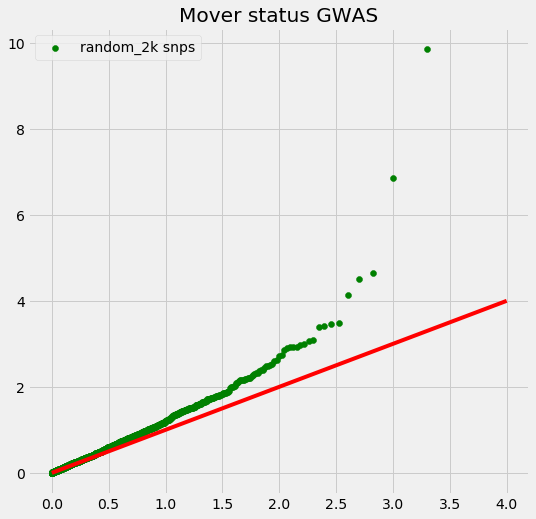

In [119]:
random_pvals = [pvalDict[x] for x in random_2k if x in pvalDict.keys()]

f,a = plt.subplots(1,1,figsize=(8,8))

sorted_pvals = sorted(-np.log10(random_pvals))
uniform_pvals = np.linspace(0,1,len(sorted_pvals))

# remove first element (cannot do log10(0))
uniform_pvals = uniform_pvals[1:]
sorted_pvals = sorted_pvals[1:]
log_uniform_pvals = sorted(-np.log10(uniform_pvals))

# plot!
a.scatter(log_uniform_pvals,sorted_pvals,c='g',label='random_2k snps')
a.plot([0,4],[0,4],'-r')
plt.legend(loc='upper left',fontsize=14)
plt.title('Mover status GWAS')
plt.show()

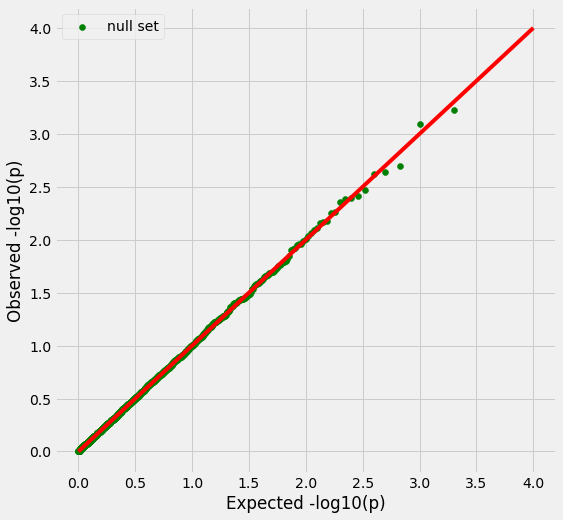

In [11]:
nullSet = np.linspace(0,1,10000)
null_2k = np.random.choice(nullSet,2000,replace=True)

#null_2k = np.random.random(size=2000)

plt.style.use('fivethirtyeight')
f,a = plt.subplots(1,1,figsize=(8,8))

sorted_pvals = sorted(-np.log10(null_2k))
uniform_pvals = np.linspace(0,1,len(sorted_pvals))

# remove first element (cannot do log10(0))
uniform_pvals = uniform_pvals[1:]
sorted_pvals = sorted_pvals[1:]
log_uniform_pvals = sorted(-np.log10(uniform_pvals))

# plot!
a.scatter(log_uniform_pvals,sorted_pvals,c='g',label='null set')
a.plot([0,4],[0,4],'-r')
plt.legend(loc='upper left',fontsize=14)
a.set_ylabel('Observed -log10(p)')
a.set_xlabel('Expected -log10(p)')
#plt.title('Mover status GWAS')
plt.show()

# remove snps & regions from mover status gwas, then ggplot remaining snps
#### e.g. remove all snps in 'intelligence' regions
#### moved to 'omit_snps_and_regions'

# GWAS of EA as binary phenotype

In [12]:
print(len(eduyears))
print(int(len(eduyears)/2.0))
for edval in edvals:
    print(edval,len(eduyears[eduyears.val >= edval]),len(eduyears[eduyears.val < edval]))
print(len(eduyears[eduyears.val >= 14]), len(eduyears[eduyears.val <= 14]))

492398
246199
7 492398 0
10 407123 85275
13 275036 217362
15 219711 272687
19 193906 298492
20 161176 331222
219711 272687


In [13]:
eduyears_vals = eduyears.val.tolist()
eduyears_binary = [1 if x < 14 else 2 for x in eduyears_vals]
print(eduyears_vals[:10])
print(eduyears_binary[:10])

[20, 20, 20, 13, 7, 7, 15, 20, 13, 19]
[2, 2, 2, 1, 1, 1, 2, 2, 1, 2]


In [14]:
eduyears['binary'] = eduyears_binary
eduyears.head(10)

,eid,eid.1,val,binary
0,3609487,3609487,20,2
1,1194904,1194904,20,2
2,1391300,1391300,20,2
3,4000122,4000122,13,1
4,4368424,4368424,7,1
5,5591624,5591624,7,1
6,3278908,3278908,15,2
7,1783089,1783089,20,2
8,4399066,4399066,13,1
9,1977431,1977431,19,2


In [15]:
test = eduyears.head(10)
for i,r in test.iterrows():
    print(str(r['eid']) + ' ' + str(r['eid']) + ' ' + str(r['binary']))

3609487 3609487 2
1194904 1194904 2
1391300 1391300 2
4000122 4000122 1
4368424 4368424 1
5591624 5591624 1
3278908 3278908 2
1783089 1783089 2
4399066 4399066 1
1977431 1977431 2


In [43]:
with open('../pheno/pheno_eduyears_binary.csv','w') as o:
    for i,r in eduyears.iterrows():
        o.write(str(r['eid']) + ' ' + str(r['eid']) + ' ' + str(r['binary']) + '\n')

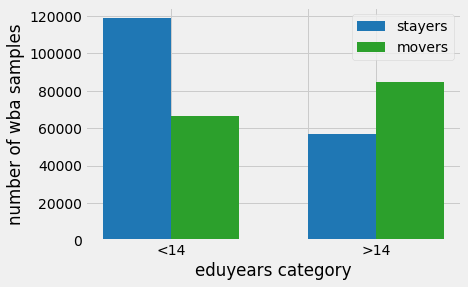

In [16]:
stayers = wba_stayers
movers = wba_movers
low_stayers = len(set(stayers)&set(eduyears[eduyears.binary==1].eid.tolist()))
low_movers = len(set(movers)&set(eduyears[eduyears.binary==1].eid.tolist()))
high_stayers = len(set(stayers)&set(eduyears[eduyears.binary==2].eid.tolist()))
high_movers = len(set(movers)&set(eduyears[eduyears.binary==2].eid.tolist()))
plt.bar(0.75,low_stayers,color='tab:blue',label = 'stayers',width=0.5)
plt.bar(1.25,low_movers,color='tab:green',label = 'movers',width=0.5)
plt.bar(2.25,high_stayers,color='tab:blue',width=0.5)
plt.bar(2.75,high_movers,color='tab:green',width=0.5)
plt.legend()
plt.xticks([1,2,2.5],['<14','','>14'])
plt.xlabel('eduyears category')
plt.ylabel('number of wba samples')
plt.show()

# GWAS removing born_far samples

In [6]:
pob_por_ac = pd.read_csv('../00_csv_files/pob_por_ac_distances.csv')
pob_por_ac.head(3)

,eid,center,distances,POB_east,POB_north,POR_east,POR_north,POB_distance,POR_distance,closest_center_POR,POR_distance_closest,POB_distance_closest,closest_center_POB
0,1136349,11004,229901.065678,68500,801500,252000.0,663000.0,234227.018930,7490.487100,11004.0,7490.487100,234227.018930,11004
1,1071275,11004,196729.509734,66500,798500,211000.0,665000.0,234138.707601,48107.415198,11004.0,48107.415198,234138.707601,11004
2,4778319,11005,287336.910264,66500,798500,323000.0,669000.0,287623.081466,5681.636384,11005.0,5681.636384,234138.707601,11004


In [7]:
all_movers = pob_por_ac[pob_por_ac.distances > 20000].eid.tolist()
all_stayers = pob_por_ac[pob_por_ac.distances <= 20000].eid.tolist()
movers = list(set(all_movers)&set(mus_wba_eids))
stayers = list(set(all_stayers)&set(mus_wba_eids))
print(len(movers),len(stayers))

152227 177519


In [8]:
born_close = pob_por_ac[pob_por_ac.POB_distance_closest <= 25000].eid.tolist()
print(len(born_close))

355364


In [9]:
born_close_movers = list(set(movers)&set(born_close))
born_close_stayers = list(set(stayers)&set(born_close))
print(len(born_close_movers))
print(len(born_close_stayers))

86908
172335


In [33]:
# make files of samples to --keep in GWAS
with open('wba_bcmovers.csv','w') as o:
    for eid in born_close_movers:
        o.write(str(eid) + ' ' + str(eid) + '\n')
with open('wba_bcstayers.csv','w') as o:
    for eid in born_close_stayers:
        o.write(str(eid) + ' ' + str(eid) + '\n')

# male female EA comparisons

In [2]:
mus_wba_eids = [int(x.split()[0]) for x in open('../00_csv_files/mus_wba_eids.csv','r').readlines()]
print(len(mus_wba_eids))
print(mus_wba_eids[0])

329746
4194304


In [3]:
pob_por_migration = pd.read_csv('../00_csv_files/pob_por_migration.csv')
print(len(pob_por_migration))
pob_por_migration.head(2)

441936


,eid,POB_east,POB_north,POR_east,POR_north,distances,angles,POR_POB_popDensity
0,1136349,68500,801500,252000.0,663000.0,229901.065678,127.044351,389.270739
1,1071275,66500,798500,211000.0,665000.0,196729.509734,132.734083,0.798042


In [4]:
all_movers = pob_por_migration[pob_por_migration.distances > 20000].eid.tolist()
all_stayers = pob_por_migration[pob_por_migration.distances <= 20000].eid.tolist()
wba_movers = list(set(all_movers)&set(mus_wba_eids))
wba_stayers = list(set(all_stayers)&set(mus_wba_eids))
print(len(wba_movers),len(wba_stayers))

152227 177519


In [5]:
eduyears = pd.read_csv('../pheno/pheno_eduYears.csv',delimiter = ' ')
print(len(eduyears))
eduyears.head(2)

492398


,eid,eid.1,val
0,3609487,3609487,20
1,1194904,1194904,20


In [6]:
pheno_cat = pd.read_csv('../00_csv_files/pheno_cat.csv')
print(len(pheno_cat))
pheno_cat.head(3)

502536


,eid,sex,Type of accommodation lived in,Own or rent accommodation lived in,Breastfed as a baby,Comparative body size at age 10,Comparative height size at age 10,Weight change compared with 1 year ago,Leisure social activities,Alcohol drinker status
0,3609487,0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,2.0
1,1194904,0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,2.0
2,1391300,1,1.0,1.0,1.0,3.0,2.0,2.0,NaN,2.0


In [7]:
females = pheno_cat[pheno_cat.sex==0].eid.tolist()
males = pheno_cat[pheno_cat.sex==1].eid.tolist()
print(len(females), len(males))

273402 229134


In [8]:
female_stayers = list(set(females)&set(wba_stayers))
female_movers = list(set(females)&set(wba_movers))
male_stayers = list(set(males)&set(wba_stayers))
male_movers = list(set(males)&set(wba_movers))
print('female_stayers: ', len(female_stayers))
print('female_movers:  ', len(female_movers))
print('male_stayers:   ', len(male_stayers))
print('male_movers:    ', len(male_movers))

female_stayers:  94359
female_movers:   82446
male_stayers:    83160
male_movers:     69781


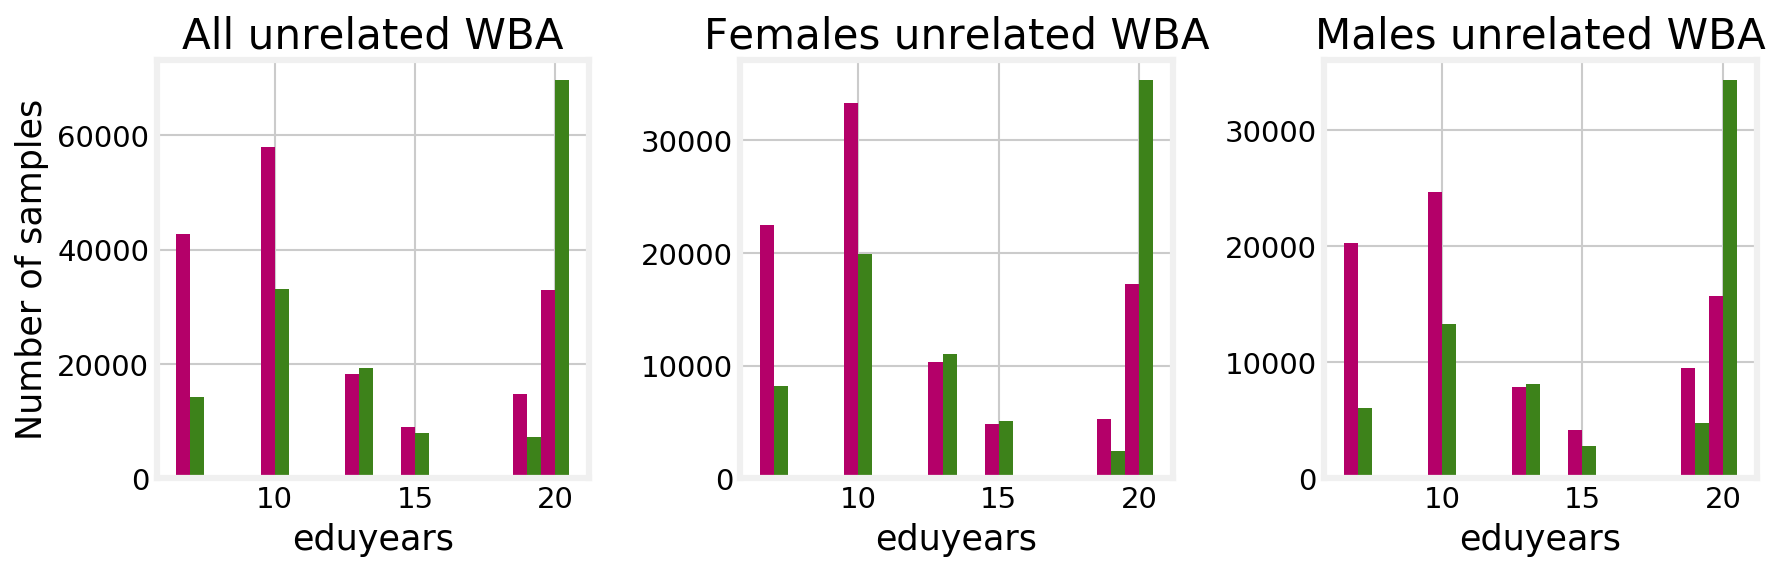

In [19]:
plt.style.use('fivethirtyeight')
f,(a1,a2,a3) = plt.subplots(1,3,figsize=(12,4),sharey=False,facecolor='w',dpi=150)
#cls = ['tab:blue','tab:green']
cls = [[0.705,0,0.411],[0.24,0.51,0.1]]

edvals = np.unique(eduyears.val.tolist())
moverList = wba_movers
stayerList = wba_stayers
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a1.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a1.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a1.set_title('All unrelated WBA')
a1.set_xlabel('eduyears')
a1.set_ylabel('Number of samples')
a1.set_facecolor('w')

edvals = np.unique(eduyears.val.tolist())
moverList = female_movers
stayerList = female_stayers
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a2.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a2.set_title('Females unrelated WBA')
a2.set_xlabel('eduyears')
a2.set_facecolor('w')
a2.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0], label = 'stayers')
a2.bar(edval + 0.25, num_movers, width = 0.5, color = cls[1], label = 'movers')
#a2.legend()

edvals = np.unique(eduyears.val.tolist())
moverList = male_movers
stayerList = male_stayers
for edval in edvals:
    eids_for_edval = eduyears[eduyears.val==edval].eid.tolist()
    
    num_stayers = len(list(set(eids_for_edval)&set(stayerList)))
    a3.bar(edval - 0.25, num_stayers, width = 0.5, color = cls[0])
    
    num_movers = len(list(set(eids_for_edval)&set(moverList)))   
    a3.bar(edval+0.25, num_movers, width = 0.5, color = cls[1])

a3.set_title('Males unrelated WBA')
a3.set_xlabel('eduyears')
a3.set_facecolor('w')
plt.tight_layout(True)
plt.show()